## 1. Load Packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

In [5]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

## 2. Load Meng's MERFISH and preprocess the data

In [6]:
from sklearn import preprocessing
#adata_mer = adata_mer

MOp_MERFISH_meng_preprocessed_for_integration_file =r'L:\Shiwei\Analysis\20211229MO4_nonclear_classifer/counts.h5ad'

merfish_raw = sc.read_h5ad(MOp_MERFISH_meng_preprocessed_for_integration_file)

In [7]:
merfish_label = pd.read_csv(r'L:\Shiwei\Analysis\20211229MO4_nonclear_classifer/cell_labels.csv', index_col=0)

In [8]:
merData = pd.DataFrame(merfish_raw.X, index = merfish_raw.obs.index, columns = merfish_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']
merData

index                                    1700022I11Rik  1810046K07Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.491629   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.000000   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                    5031425F14Rik  5730522E02Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.983257   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.557620   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

index                                        Acta2  Adam2   Adamts2   Adamts4  \
index                                                                           
10000143038275111136124942858811168393    0.000000    0.0  0.000000  0.000000   
100001798412490480358118871918100400402   0.000000    0.0  0.000000  0.000000   
100006878605830627922364612565348097824  25.567039    0.0  0.000000  0.000000   
100007228202835962319771548915451072492   0.000000    0.0  0.000000  0.000000   
100009332472089331948140672873134747603   0.491629    0.0  0.000000  0.000000   
...                                            ...    ...       ...       ...   
99987465505639073211021560543065098772    0.000000    0.0  0.000000  0.000000   
99989592830367590092304100078674096866    0.000000    0.0  0.000000  1.829112   
99991756591196613545069880666241120777    0.000000    0.0  0.000000  0.000000   
99997421766159526763299676887100858104    0.000000    0.0  0.000000  0.000000   
99997470167777465101376150817407669505    0.000000    0.0  0.475026  0.000000   

index                                       Adra1b       Alk  ...      Gad2  \
index                                                         ...             
10000143038275111136124942858811168393    0.659448  0.000000  ...  0.261892   
100001798412490480358118871918100400402   0.000000  0.000000  ...  0.512115   
100006878605830627922364612565348097824   0.000000  0.000000  ...  0.199059   
100007228202835962319771548915451072492   0.000000  0.000000  ...  0.240500   
100009332472089331948140672873134747603   0.983257  0.000000  ...  1.726676   
...                                            ...       ...  ...       ...   
99987465505639073211021560543065098772    0.557620  2.788098  ...  4.711612   
99989592830367590092304100078674096866   14.632893  0.000000  ...  0.354238   
99991756591196613545069880666241120777    0.000000  0.000000  ...  0.944207   
99997421766159526763299676887100858104    2.795264  0.000000  ...  0.581056   
99997470167777465101376150817407669505    0.000000  0.000000  ...  3.059676   

index             

In [9]:
# merge dataframes
merCluster=merData.merge(labels, how='inner', left_index=True, right_index=True)
merCluster.shape

merCluster

1700022I11Rik  1810046K07Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.491629   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.000000   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

                                         5031425F14Rik  5730522E02Rik  \
index                                                                   
10000143038275111136124942858811168393             0.0       0.000000   
100001798412490480358118871918100400402            0.0       0.000000   
100006878605830627922364612565348097824            0.0       0.000000   
100007228202835962319771548915451072492            0.0       0.000000   
100009332472089331948140672873134747603            0.0       0.983257   
...                                                ...            ...   
99987465505639073211021560543065098772             0.0       0.557620   
99989592830367590092304100078674096866             0.0       0.000000   
99991756591196613545069880666241120777             0.0       0.000000   
99997421766159526763299676887100858104             0.0       0.000000   
99997470167777465101376150817407669505             0.0       0.475026   

                                             Acta2  Adam2   Adamts2   Adamts4  \
index                                                                           
10000143038275111136124942858811168393    0.000000    0.0  0.000000  0.000000   
100001798412490480358118871918100400402   0.000000    0.0  0.000000  0.000000   
100006878605830627922364612565348097824  25.567039    0.0  0.000000  0.000000   
100007228202835962319771548915451072492   0.000000    0.0  0.000000  0.000000   
100009332472089331948140672873134747603   0.491629    0.0  0.000000  0.000000   
...                                            ...    ...       ...       ...   
99987465505639073211021560543065098772    0.000000    0.0  0.000000  0.000000   
99989592830367590092304100078674096866    0.000000    0.0  0.000000  1.829112   
99991756591196613545069880666241120777    0.000000    0.0  0.000000  0.000000   
99997421766159526763299676887100858104    0.000000    0.0  0.000000  0.000000   
99997470167777465101376150817407669505    0.000000    0.0  0.475026  0.000000   

                                            Adra1b       Alk  ...       Sst  \
index                                                         ...             
10000143038275111136124942858811168393    0.659448  0.000000  ...  0.079685   
100001798412490480358118871918100400402   0.000000  0.000000  ...  0.171461   
100006878605830627922364612565348097824   0.000000  0.000000  ...  0.051351   
100007228202835962319771548915451072492   0.000000  0.000000  ...  0.011399   
100009332472089331948140672873134747603   0.983257  0.000000  ...  0.748264   
...                                            ...       ...  ...       ...   
99987465505639073211021560543065098772    0.557620  2.788098  ...  0.195306   
99989592830367590092304100078674096866   14.632893  0.000000  ...  0.000000   
99991756591196613545069880666241120777    0.000000  0.000000  ...  0.110999   
99997421766159526763299676887100858104    2.795264  0.000000  ...  0.000000   
99997470167777465101376150817407669505    0.000000  0.000000  ...  0.000000   

                                            Rab3b    Slc17a

In [10]:
# Scale variable measurements for model training
merGroupedDataZ = pd.DataFrame(preprocessing.scale(merCluster.iloc[:,:-5]),index = merCluster.iloc[:,:-5].index, columns = merCluster.iloc[:,:-5].columns)

merGroupedDataZ['subclass'] = merCluster.iloc[:,-2]

C:\Users\shiwei\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\shiwei\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [11]:

adata_ref = merGroupedDataZ

# exclude the last label column for X training
adata_ref.iloc[:,:-1]

adata_ref['subclass']

index
10000143038275111136124942858811168393       Astro
100001798412490480358118871918100400402       Endo
100006878605830627922364612565348097824        SMC
100007228202835962319771548915451072492       Endo
100009332472089331948140672873134747603    L2/3 IT
                                            ...   
99987465505639073211021560543065098772       Pvalb
99989592830367590092304100078674096866       L5 ET
99991756591196613545069880666241120777     L4/5 IT
99997421766159526763299676887100858104       L5 ET
99997470167777465101376150817407669505     L2/3 IT
Name: subclass, Length: 280186, dtype: object

## 3. Load new MERFISH pre-analyzed data for prediction

In [12]:

h5ad_fd=r'L:\Shiwei\Analysis\20220318_nonclear_adaptors_classifier'
h5ad_fname = os.path.join(h5ad_fd,'20220303.h5ad')
MOp_MERFISH_preprocessed_for_integration_file = h5ad_fname
#MOp_MERFISH_preprocessed_for_integration_file = r'L:\Shiwei\Analysis\20211229MO4_nonclear_classifer\20211230.h5ad'
adata_query= sc.read_h5ad(MOp_MERFISH_preprocessed_for_integration_file)



In [13]:
adata_query.obs

fov       volume     center_x  \
Unnamed: 0                                                               
100021666282169261875251669708898521967    0  1312.494701 -6548.252094   
100134373611466158055138835746571466137    0   399.373048 -6656.738097   
106371753480505603216303823112390513909    0   314.737427 -6671.102097   
110669601368775703043280150962614735338    0  2069.121391 -6617.048096   
112802742168819399487519675729622867384    0  1406.385823 -6647.234097   
...                                      ...          ...          ...   
80935166830328088006889481110944973492   157   748.095290  3709.028003   
81430215173660398424229627644681750307   157  1089.937054  3736.082003   
89516269722862325926466460373430221742   157   766.453494  3657.512001   
90644651142093367051876837244950170865   157  1077.775818  3713.186003   
9770578255941884027639694587606016740    157   724.513305  3606.109400   

                                            center_y        min_x  \
Unnamed: 0                                                          
100021666282169261875251669708898521967 -5115.923898 -6554.310894   
100134373611466158055138835746571466137 -5148.809899 -6660.906897   
106371753480505603216303823112390513909 -5145.893899 -6676.242897   
110669601368775703043280150962614735338 -5122.133898 -6626.130896   
112802742168819399487519675729622867384 -5176.241900 -6657.342897   
...                                              ...          ...   
80935166830328088006889481110944973492   -510.436007  3703.185203   
81430215173660398424229627644681750307   -668.764011  3729.429203   
89516269722862325926466460373430221742   -550.180008  3652.857201   
90644651142093367051876837244950170865   -528.418008  3704.913203   
9770578255941884027639694587606016740    -554.338008  3602.000000   

                                               max_x        min_y  \
Unnamed: 0                                                          
100021666282169261875251669708898521967 -6542.193294 -5124.034698   
100134373611466158055138835746571466137 -6652.569297 -5153.302699   
106371753480505603216303823112390513909 -6665.961297 -5150.170699   
110669601368775703043280150962614735338 -6607.965296 -5135.482699   
112802742168819399487519675729622867384 -6637.125296 -5184.730700   
...                                              ...          ...   
80935166830328088006889481110944973492   3714.870803  -516.278807   
81430215173660398424229627644681750307   3742.734804  -674.822811   
89516269722862325926466460373430221742   3662.166802  -560.018808   
90644651142093367051876837244950170865   3721.458803  -535.934808   
9770578255941884027639694587606016740    3610.218800  -560.774808   

                                               max_y  n_genes_by_counts  \
Unnamed: 0                                                                
100021666282169261875251669708898521967 -5107.813098                113   
100134373611466158055138835746571466137 -5144.317099                 21   
106371753480505603216303823112390513909 -5141.617099                 35   
110669601368775703043280150962614735338 -5108.785098                116   
112802742168819399487519675729622867384 -5167.753100                 96   
...                                              ...                ...   
80935166830328088006889481110944973492   -504.593207                 80   
81430215173660398424229627644681750307   -662.705211                 65   
89516269722862325926466460373430221742   -540.341208                 75   
90644651142093367051876837244950170865   -520.901207                 83   
9770578255941884027639694587606016740    -547.901208                 37   

                                         total_counts leiden leiden_subclass  \
Unnamed: 0                                                                     
100021666282169261875251669708898521967         249.0     31              27   
100134373611466158055138835746571466137          32.0      6      

In [14]:
# Check different UMAP to select one that looks suitable

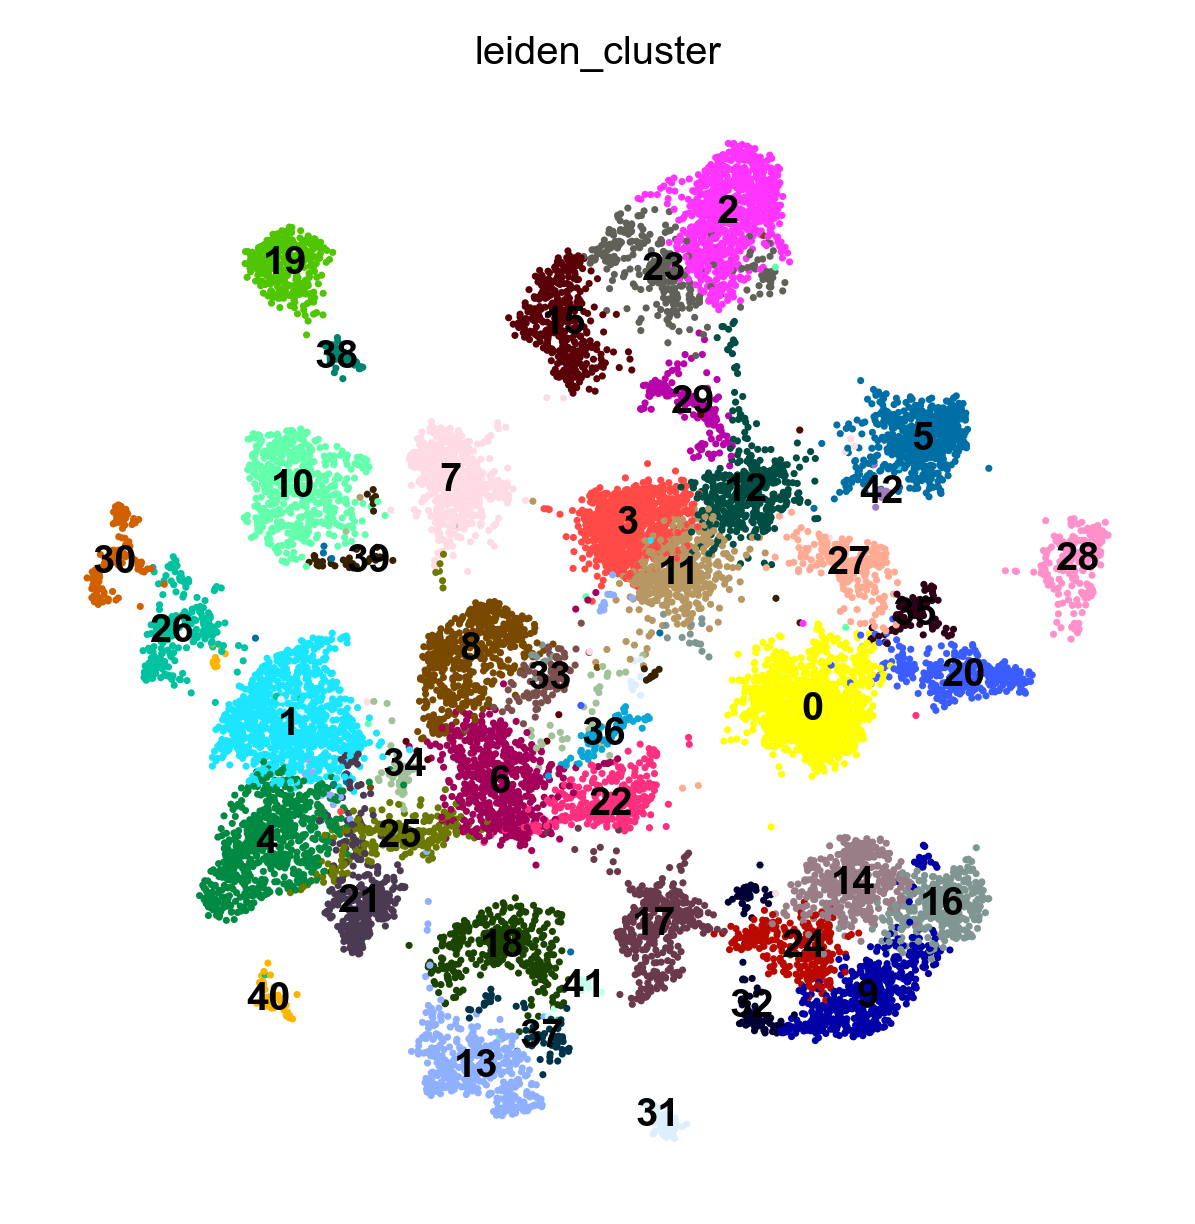

Wall time: 458 ms


In [17]:
%%time

# Plot the UMAP result #1
sc.pl.umap(adata_query, color='leiden_cluster', legend_loc='on data')

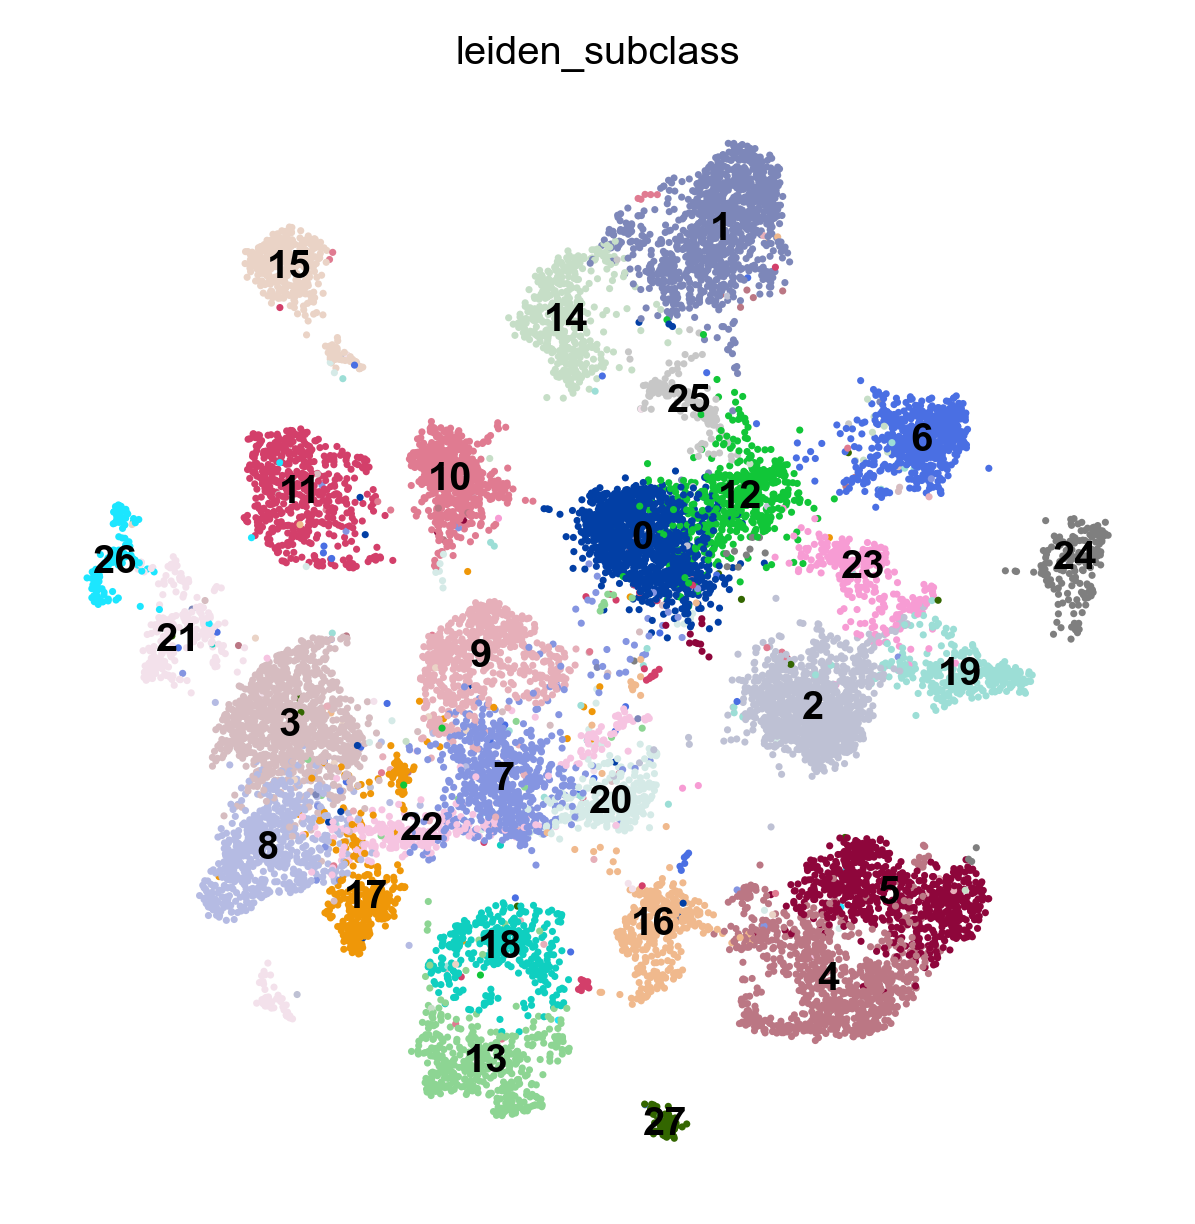

Wall time: 397 ms


In [18]:
%%time

# Plot the UMAP result #2

sc.pl.umap(adata_query, color='leiden_subclass', legend_loc='on data')

## 4. Train the classifer

In [19]:
# Sorting code from Meng

from random import choice

def permuteOrder(df,axis,switch = 0):
    penaltyMat = np.zeros((df.shape[0],df.shape[1]))
    for i in range(penaltyMat.shape[0]):
        for j in range(penaltyMat.shape[1]):
            penaltyMat[i,j] = np.abs(i-(df.shape[0])/(df.shape[1])*j)**0.5
    if axis == 0:
        sort = df.index.values.copy()
    elif axis == 1:
        sort = df.columns.values.copy()
    dfCopy = df.values.copy()
#     print(dfCopy)
    for i in range(df.shape[int(axis)]):
        penalty = np.full((df.shape[int(axis)]),np.inf)
        for j in range(len(penalty)):
            tempMat = dfCopy.copy()
            if axis == 0:
                tempMat[[i, j],:] = tempMat[[j, i],:]
            elif axis == 1:
                tempMat[:,[i, j]] = tempMat[:,[j, i]]
            penalty[j] = sum(sum(tempMat*penaltyMat))
        idx = np.argmin(penalty)
        if not idx == i:                
            switch += 1
        if axis == 0:
            dfCopy[[i, idx], :] = dfCopy[[idx, i], :];
        elif axis == 1:
            dfCopy[:,[i, idx]] = dfCopy[:,[idx, i]];
        else:
            print('bad axis {}'.format(axis))
        sort[[i, idx]] = sort[[idx, i]]
    return switch,sort

def runPermutation(df, axis = 'Both', maxIter = 100,maxTrys = 9):  # initial maxTrys = 5
    iterations = 0
    trys = 0
    sortedDF = df.copy(deep=True)
    while iterations < maxIter:
        if axis == 'Both':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            switch,columnSort = permuteOrder(sortedDF,1,switch)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
        if axis == 'Rows':
            switch,rowSort = permuteOrder(sortedDF,0)
            sortedDF = sortedDF.loc[rowSort,:].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentIndex = np.array(range(len(sortedDF.index.values)))
                in1 = choice(currentIndex)
                in2 = choice(currentIndex)
                if len(currentIndex)>1:
                    while in1 == in2:
                        in2 = choice(currentIndex)
                currentIndex[[in1,in2]] = currentIndex[[in2,in1]]
                sortedDF = sortedDF.iloc[currentIndex,:].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                 iterations = maxIter
        if axis == 'Columns':
            switch,columnSort = permuteOrder(sortedDF,1)
            sortedDF = sortedDF.loc[:,columnSort].copy(deep=True)
            iterations += 1
            if switch == 0 and trys < maxTrys:
                currentCol = np.array(range(len(sortedDF.columns.values)))
                in1 = choice(currentCol)
                in2 = choice(currentCol)
                if len(currentCol)>1:
                    while in1 == in2:
                        in2 = choice(currentCol)
                currentCol[[in1,in2]] = currentCol[[in2,in1]]
                sortedDF = sortedDF.iloc[:,currentCol].copy(deep=True)
                trys += 1
            elif switch == 0 and trys == maxTrys:
                iterations = maxIter
    return sortedDF, sortedDF.index, sortedDF.columns

In [20]:
def train_nn_gene_exp_classifier(adata, label_column, genes):
    '''Train a nueral net classifier using the gene expressions.'''
    gene_ids = [adata.var.index.get_loc(g) for g in genes]
    X = adata.X[:, gene_ids]
    Y = np.array(adata.obs[label_column])
    
    nnc = MLPClassifier(max_iter = 500)
    nnc.fit(X, Y)
    return nnc

def predict_classes(classifier, adata, prediction_column, genes):
    '''Predict the classes of cells using a trained classifier.'''
    gene_ids = [adata.var.index.get_loc(g) for g in genes]
    X = adata.X[:, gene_ids]
    adata.obs[prediction_column] = classifier.predict(X)
    
def plot_cluster_correspondance(adata_ref, adata_query, ref_cluster_column, query_cluster_column,
                                prediction_column='predicted_classes', genes=None):
    '''Plot the correspondance between clusters from two data sets.'''
    # Make a copy of the query data set

    adata_query = adata_query.copy()
    
    # Use the shared genes for predictions if the gene set is not specified
    if genes is None:
        genes = list(set(adata_ref.var.index).intersection(set(adata_query.var.index)))
        
    # Train a classifier
    print(f'Train a classifier using {len(genes)} genes and {adata_ref.shape[0]} cells.')
    nnc = train_nn_gene_exp_classifier(adata_ref, ref_cluster_column, genes)
    

        
    
    # Make predictions
    print('Predict cell types.')
    predict_classes(nnc, adata_query, prediction_column, genes)
    
    # Count predictions
    prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
    prediction_counts['count'] = 1
    
    predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)
    predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
    #fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
    fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
    # Plot
    fig1=plt.figure(figsize = (10,9))
    sns.set(font_scale=0.3)
    #sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    
    plt.xlabel(ref_cluster_column) 
    plt.ylabel(query_cluster_column)
    plt.show()
    
    return fractions_sorted
    

In [21]:
# Train the classifer using the shared varibales

genes_from_ref = set(merData.columns)
genes = list(genes_from_ref.intersection(set(adata_query.var.index)))


# Train a classifier
gene_ids = [merData.columns.get_loc(g) for g in genes]

print('Train cell type classifier.')

X = np.array(adata_ref.iloc[:,:-1])[:, gene_ids]
Y = np.array(adata_ref['subclass'])
nnc = MLPClassifier(max_iter = 500)
nnc.fit(X, Y)

Train cell type classifier.


MLPClassifier(max_iter=500)

In [22]:
sorted_predicted_labels = ['Lamp5','Sncg','Vip','Sst','Pvalb','L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L6 IT Car3','L5 ET','L5/6 NP','L6 CT','L6b','Astro','OPC','Oligo','Endo','VLMC','SMC','Peri',
                         'Micro','PVM','other']

## 5. Use the trained classifer to make initial prediction

Predict cell types.


<ipython-input-23-6aed7bc6238d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


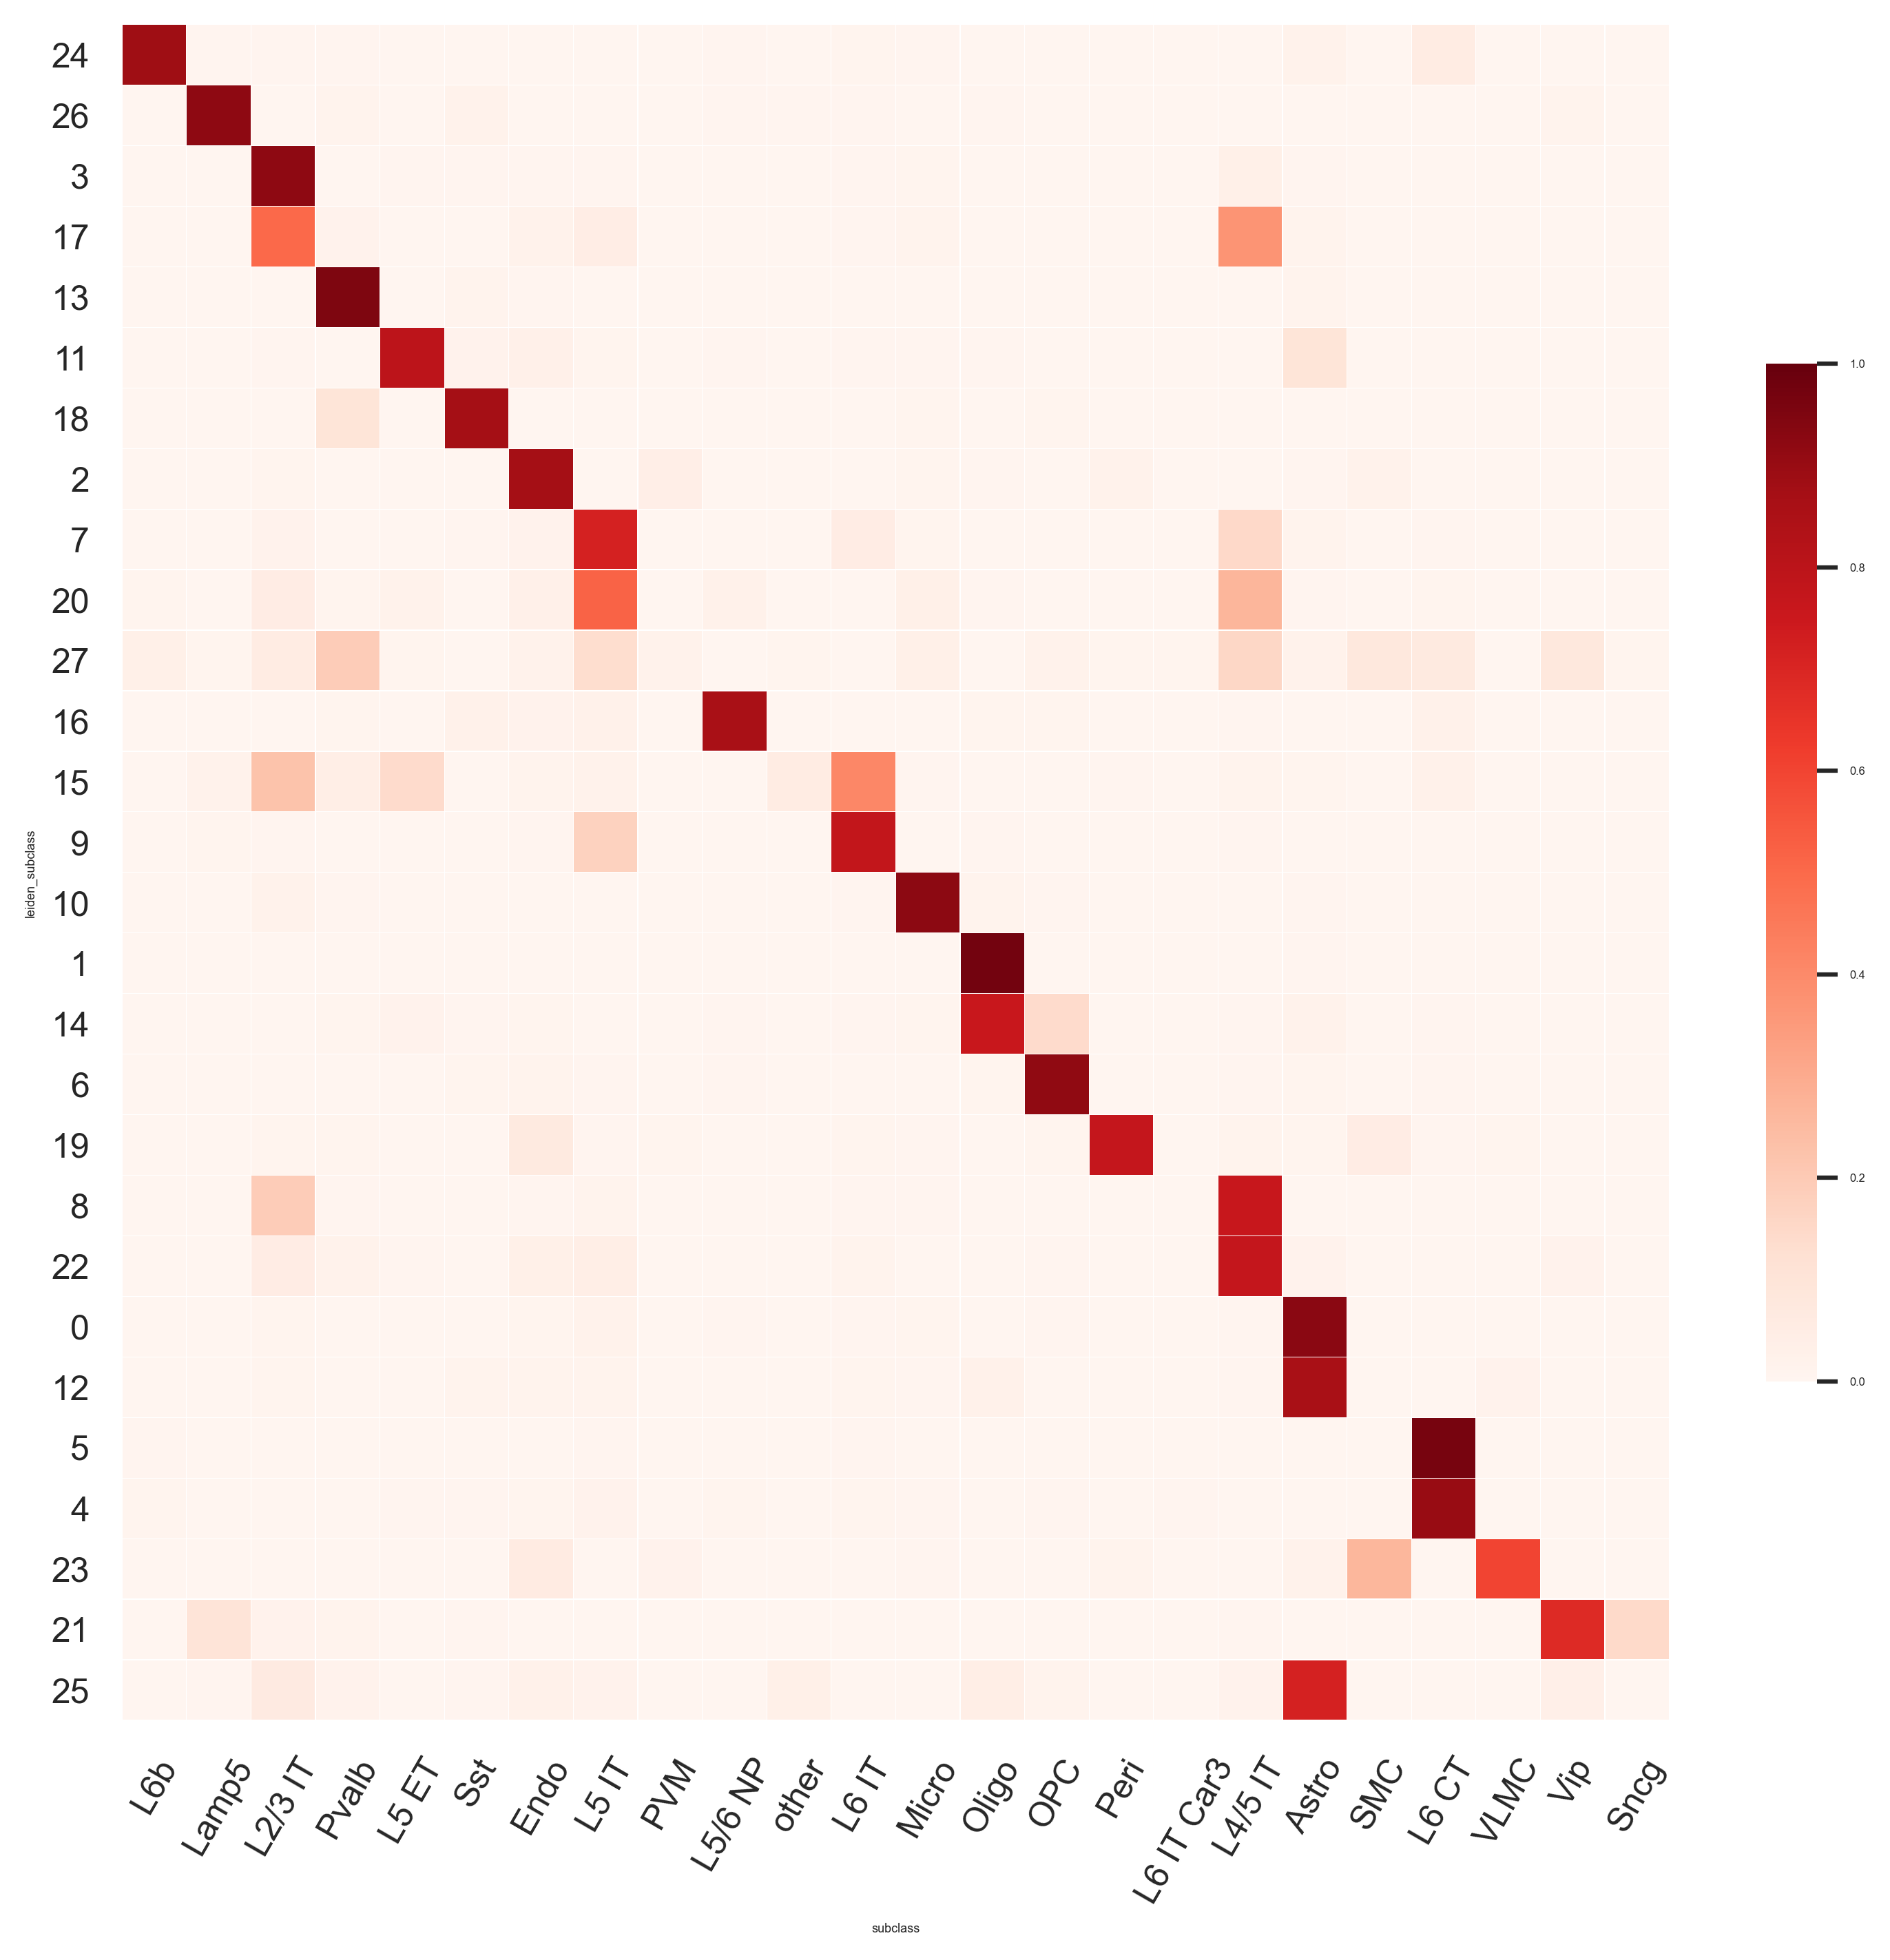

In [23]:
prediction_column = 'subclass_prediction_label'

ref_cluster_column = 'subclass'

query_cluster_column = 'leiden_subclass'
#query_cluster_column = 'leiden_cluster'



print('Predict cell types.')
predict_classes(nnc, adata_query, prediction_column, genes)
    
# Count predictions
prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1
    
predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (10,9))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)   
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

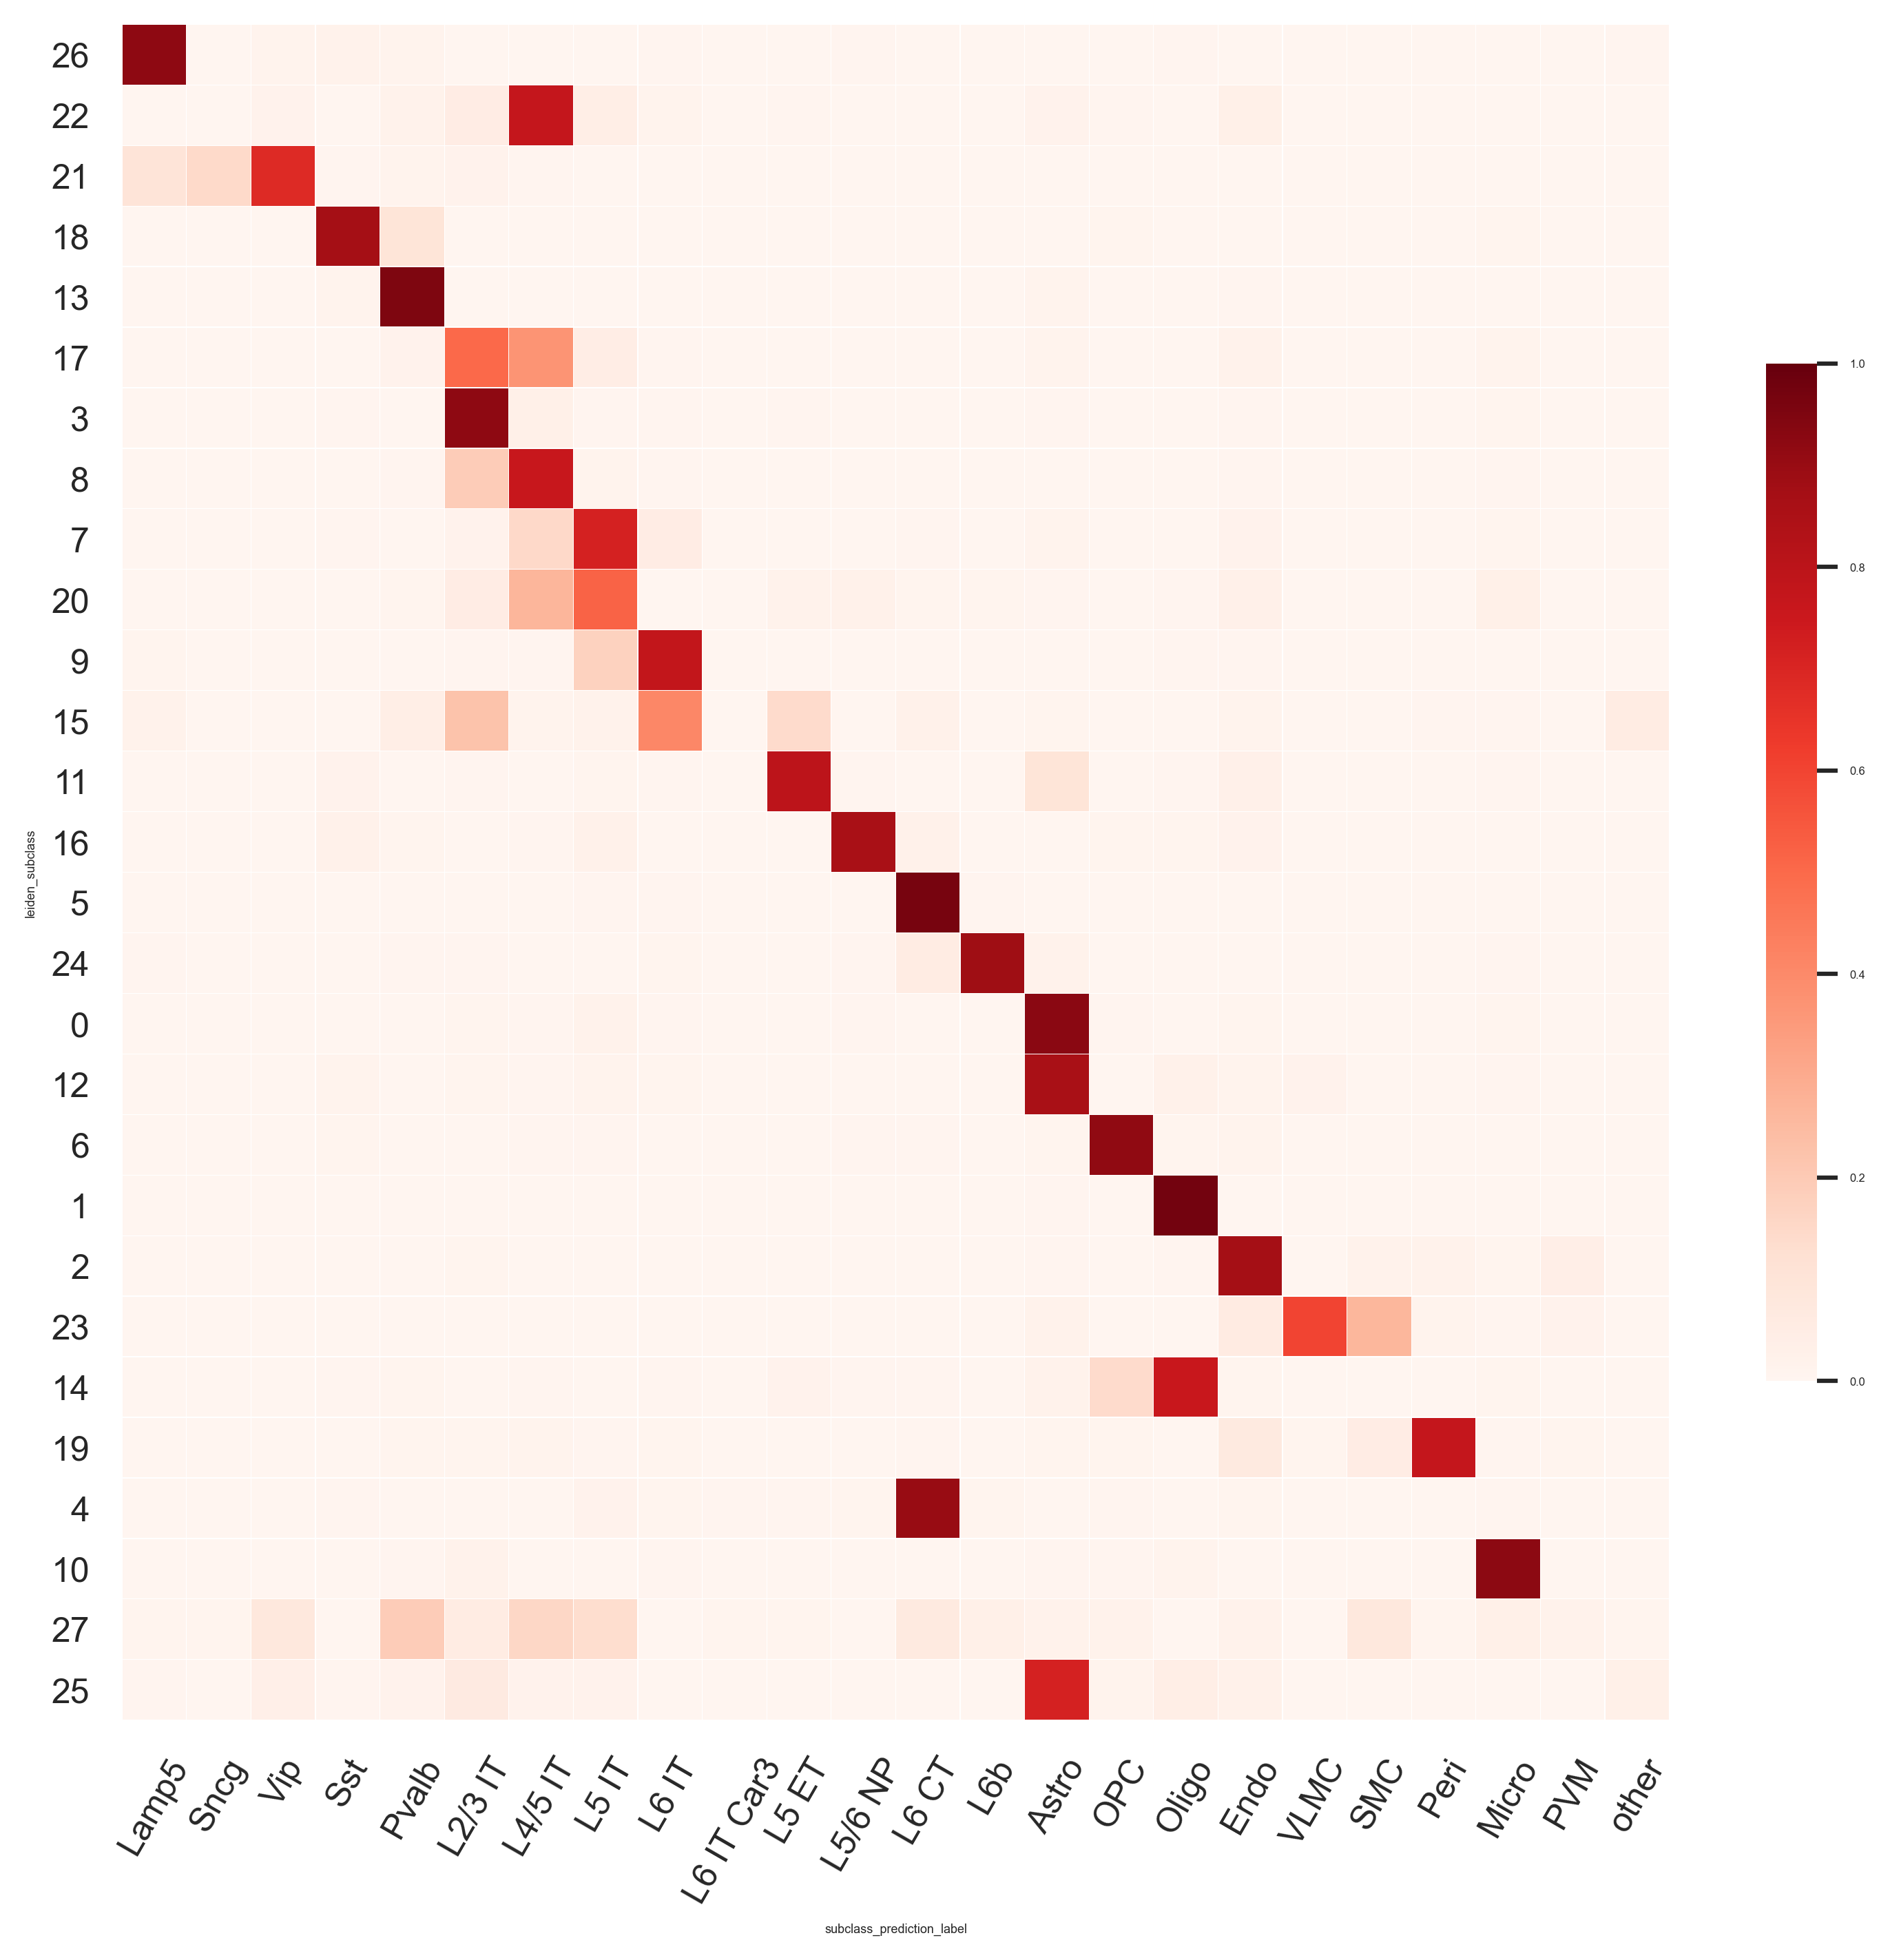

In [24]:
# sort the labels along the x-axis (optional)

sorted_predicted_labels = ['Lamp5','Sncg','Vip','Sst','Pvalb','L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L6 IT Car3','L5 ET','L5/6 NP','L6 CT','L6b','Astro','OPC','Oligo','Endo','VLMC','SMC','Peri',
                         'Micro','PVM','other']

fractions_sorted_by_label = fractions_sorted[sorted_predicted_labels]

sorted_coor_df, rows, columns = runPermutation(fractions_sorted_by_label,'Rows',maxIter = 100,maxTrys = 15)

manual_coor_df = sorted_coor_df


_plot = True
if _plot:
   # Plot
    fig1=plt.figure(figsize = (10,9))
    sns.set(font_scale=0.3)
    #sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    sns.heatmap(manual_coor_df, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    plt.xticks(rotation = 60)
    plt.yticks(rotation = 'horizontal')
    
    
    #plt.xlabel(sorted_coor_df.columns) 
    #plt.ylabel(sorted_coor_df.index)
    plt.show()

## 6. Merge and manually label the predicted clusters

... storing 'subclass_prediction_label' as categorical


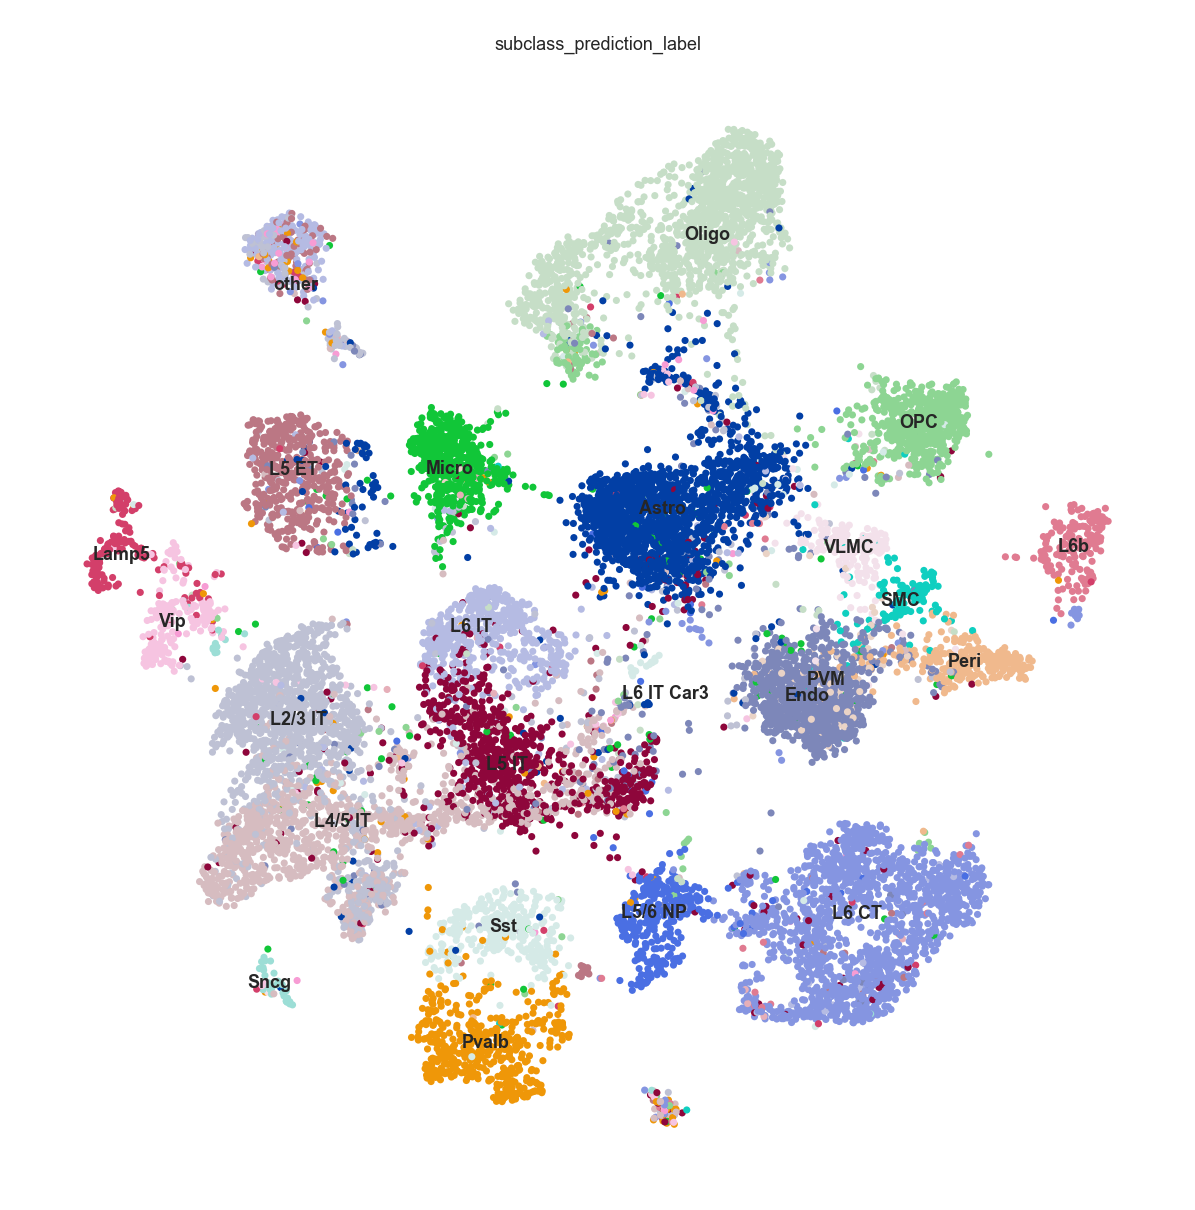

In [25]:
# Plot the predicted labels on UMAP to guide the manual labeling of the de novo clustering below
# use this to manually merge and split the original query column (e.g., leiden_subclass)
sc.pl.umap(adata_query, color='subclass_prediction_label', legend_loc='on data')

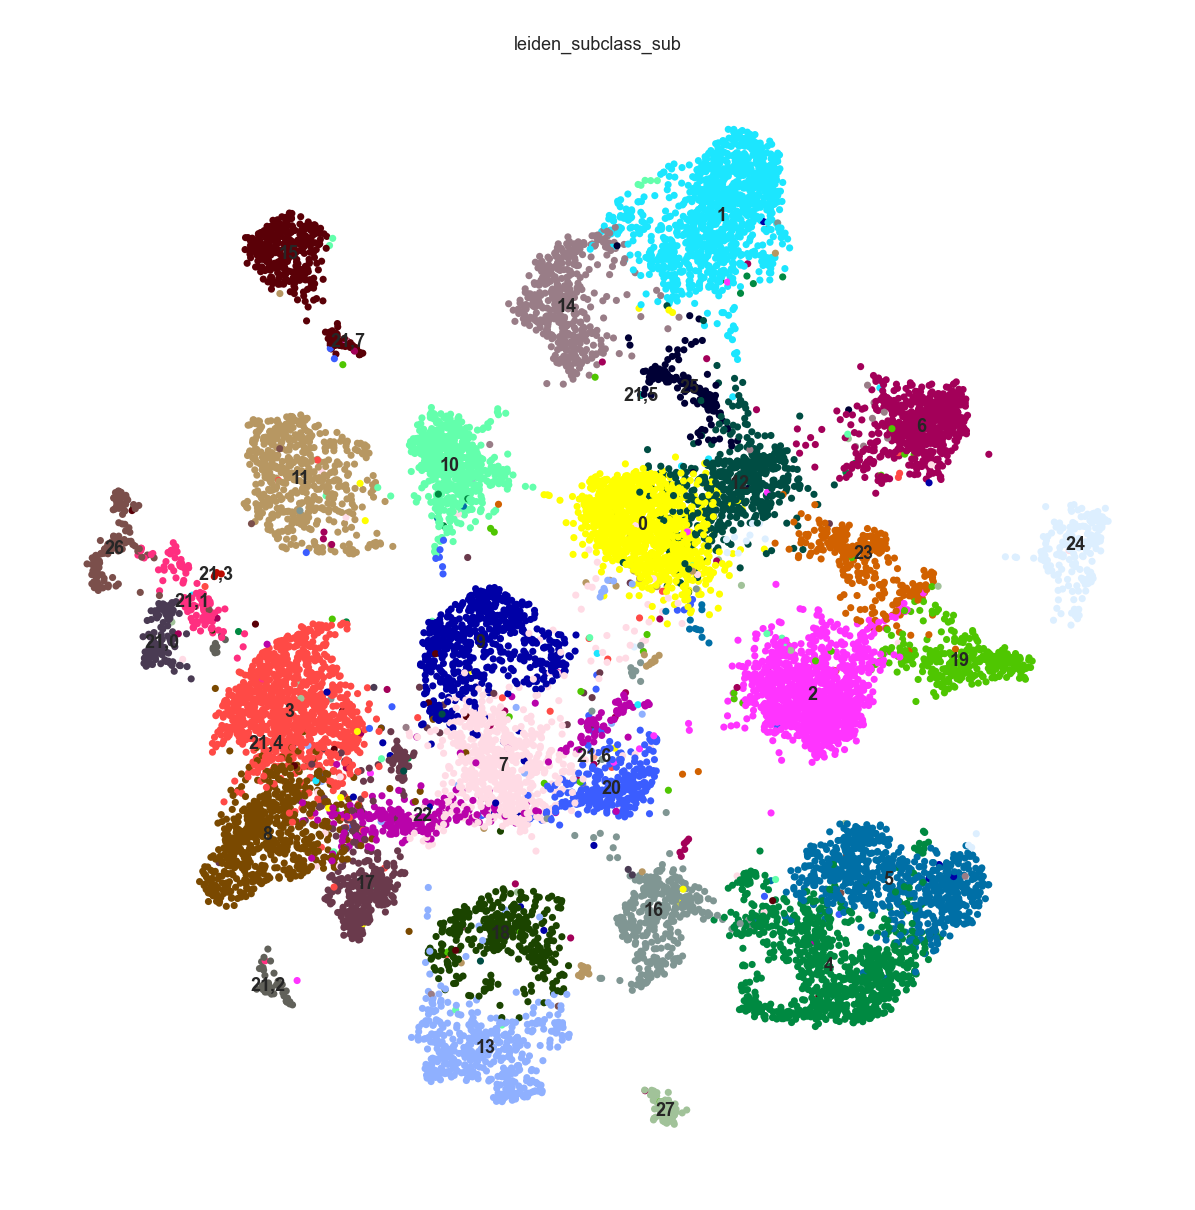

Wall time: 16.7 s


In [35]:
%%time
# sub-split the cluster 21 to obtain Sncg and Lamp5
# adjust resolution to test (use small value to avoid oversplit)
sc.tl.leiden(adata_query, resolution=0.1,restrict_to=('leiden_subclass',['21']),
           key_added='leiden_subclass_sub')

sc.tl.umap(adata_query)
# Plot the UMAP
sc.pl.umap(adata_query, color='leiden_subclass_sub', legend_loc='on data')

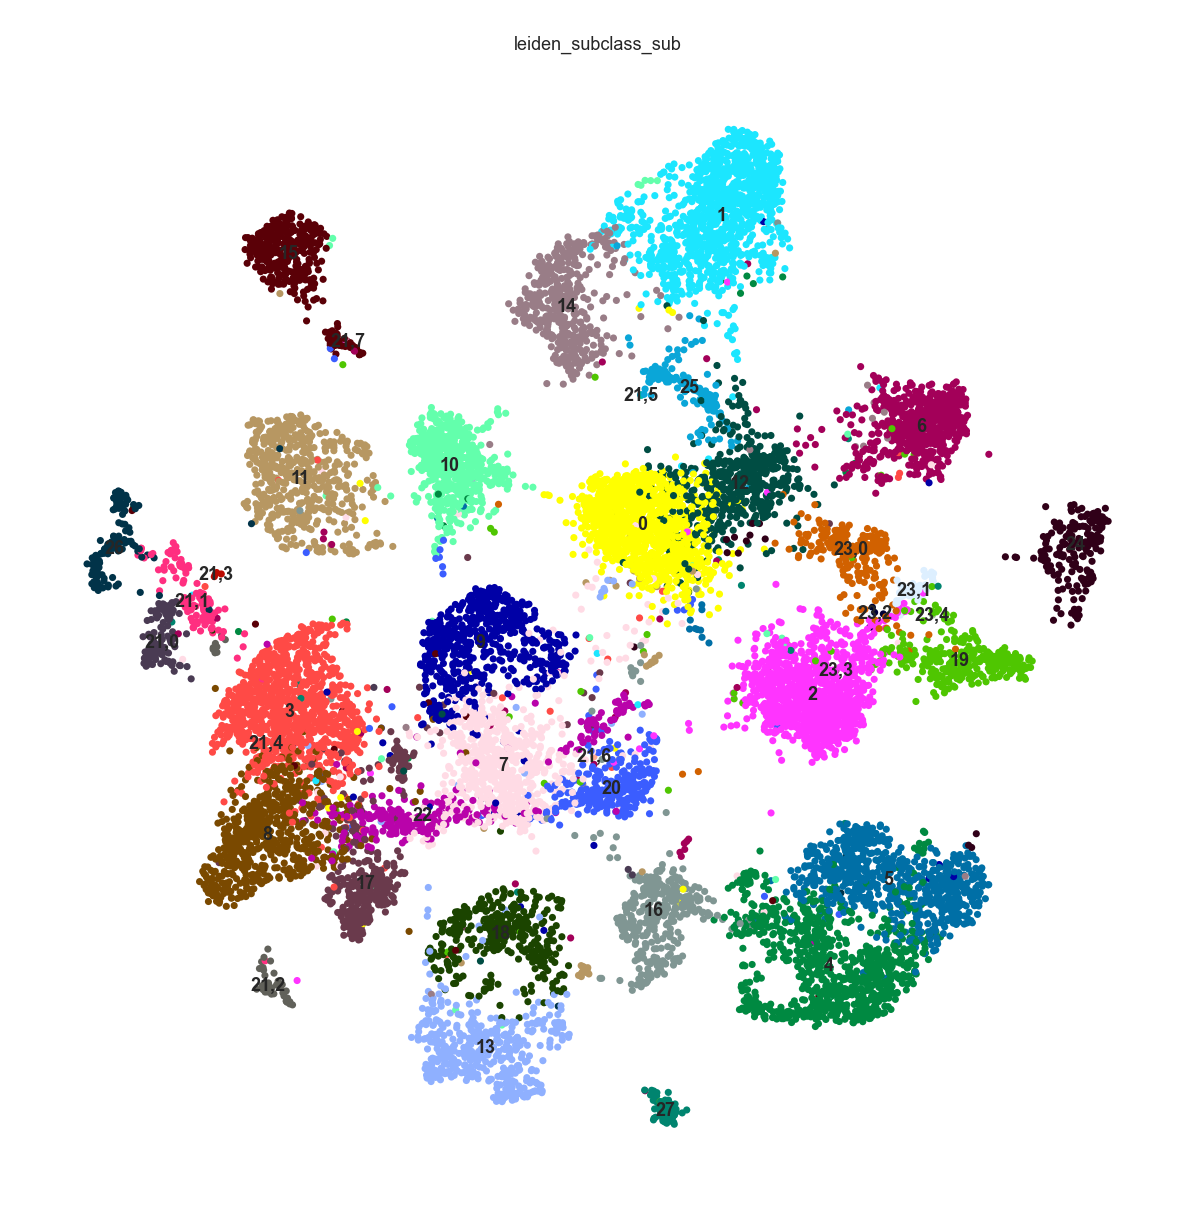

Wall time: 10.4 s


In [37]:
%%time
# sub-split the cluster 23 to obtain VLMC and SMC
# adjust resolution to test (use small value to avoid oversplit)
sc.tl.leiden(adata_query, resolution=0.1,restrict_to=('leiden_subclass_sub',['23']),
           key_added='leiden_subclass_sub')

sc.tl.umap(adata_query)
# Plot the UMAP
sc.pl.umap(adata_query, color='leiden_subclass_sub', legend_loc='on data')

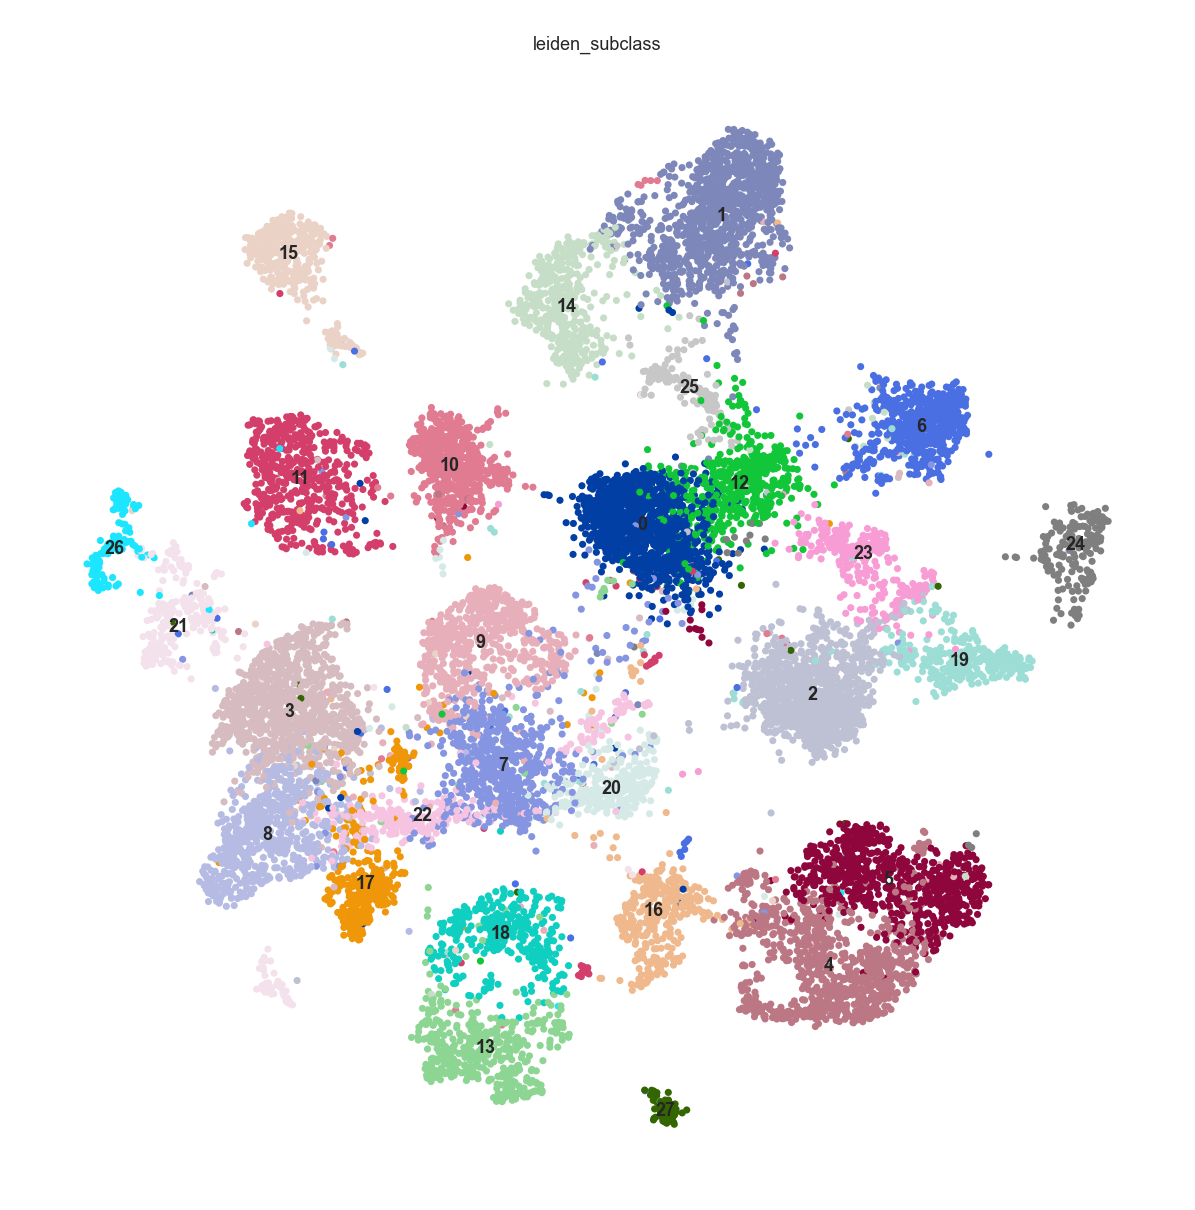

Wall time: 446 ms


In [31]:
%%time

# Compare to the prediction above to find de novo clusters of interest to split or merge

sc.pl.umap(adata_query, color='leiden_subclass', legend_loc='on data')

In [48]:
np.unique(adata_query.obs['leiden_subclass'])

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '3',
       '4', '5', '6', '7', '8', '9'], dtype=object)

In [28]:
#np.unique(adata_query.obs['subclass_manual_label'])

In [49]:
# duplicate the column for manual labeling of the final clustering
adata_query.obs['subclass_manual_label'] = adata_query.obs['leiden_subclass_sub'] 

In [59]:
# manual assign labels



adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'26':'Lamp5'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'21,0':'Vip','21,1':'Vip','21,3':'Vip'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'21,2':'Sncg'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'18':'Sst','21,4':'Sst'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'13':'Pvalb','21,6':'Pvalb'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'3':'L2/3 IT','21,5':'L2/3 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'8':'L4/5 IT', '17':'L4/5 IT','22':'L4/5 IT','21,7':'L4/5 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'7':'L5 IT','20':'L5 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'9':'L6 IT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'11':'L5 ET'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'16':'L5/6 NP'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'4':'L6 CT','5':'L6 CT'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'24':'L6b'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'0':'Astro','12':'Astro','25':'Astro'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'6':'OPC'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'1':'Oligo','14':'Oligo'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'2':'Endo-PVM','23,3':'Endo-PVM'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'19':'Peri','23,4':'Peri'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'23,0':'VLMC'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'23,1':'SMC','23,2':'SMC'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'10':'Micro'}})

adata_query.obs = adata_query.obs.replace({'subclass_manual_label':{'15':'Other','27':'Other'}})

... storing 'subclass_manual_label' as categorical
... storing 'subclass_prediction_label_2' as categorical


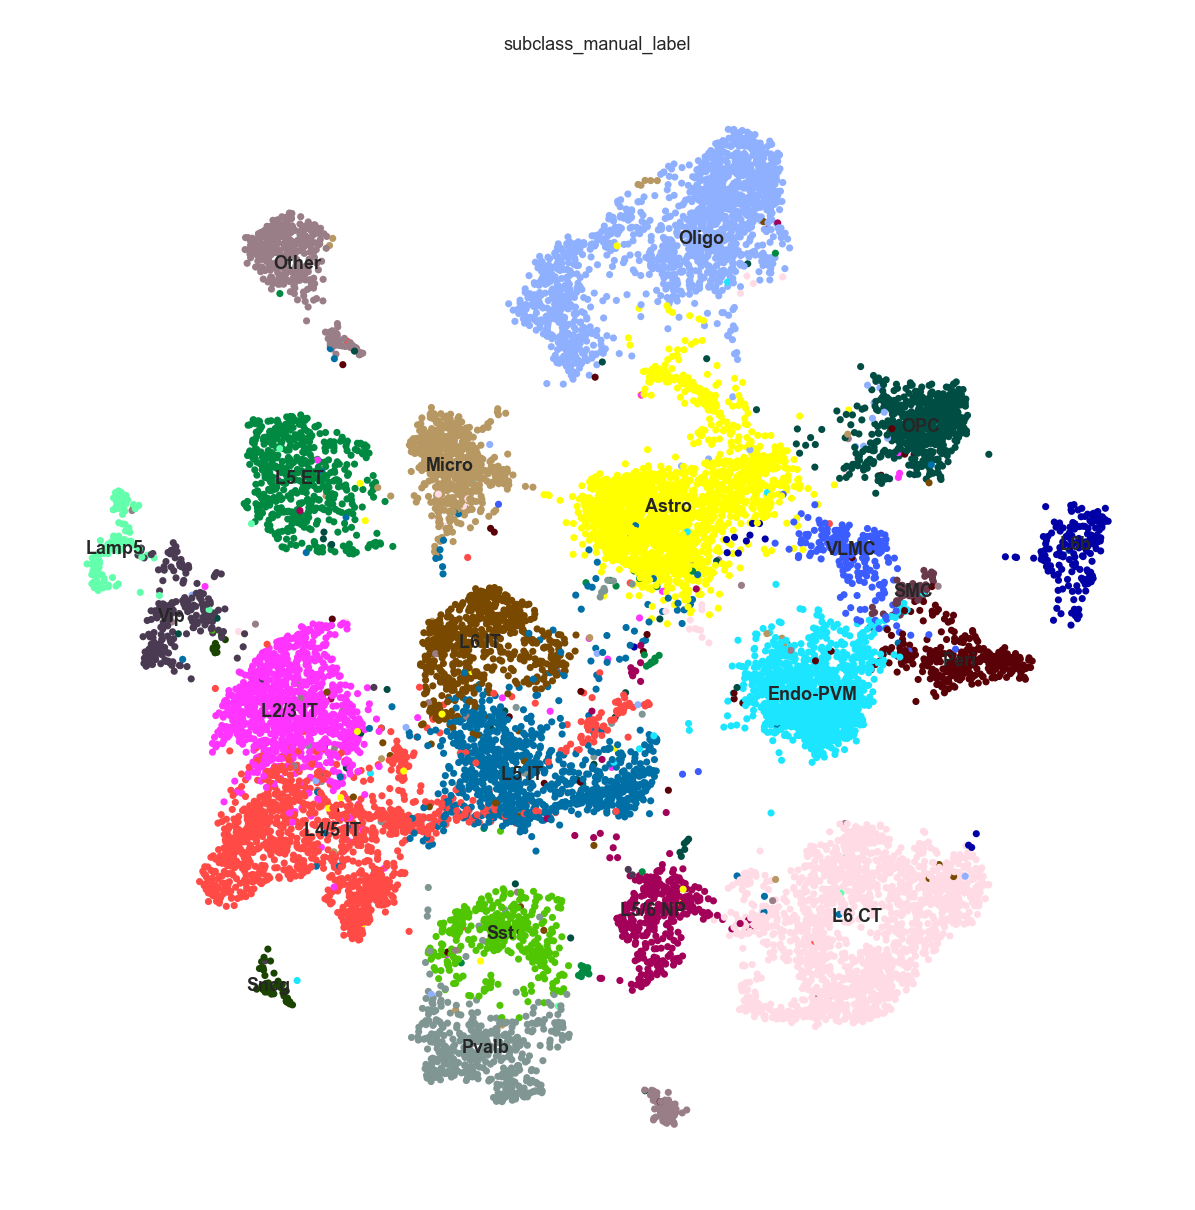

In [60]:
# Plot the manually labeled UMAP
sc.pl.umap(adata_query, color='subclass_manual_label', legend_loc='on data')

## 6. Re-evaluate the clustering result using the classifer

Predict cell types.


<ipython-input-61-ce1d5b89887e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_counts['count'] = 1


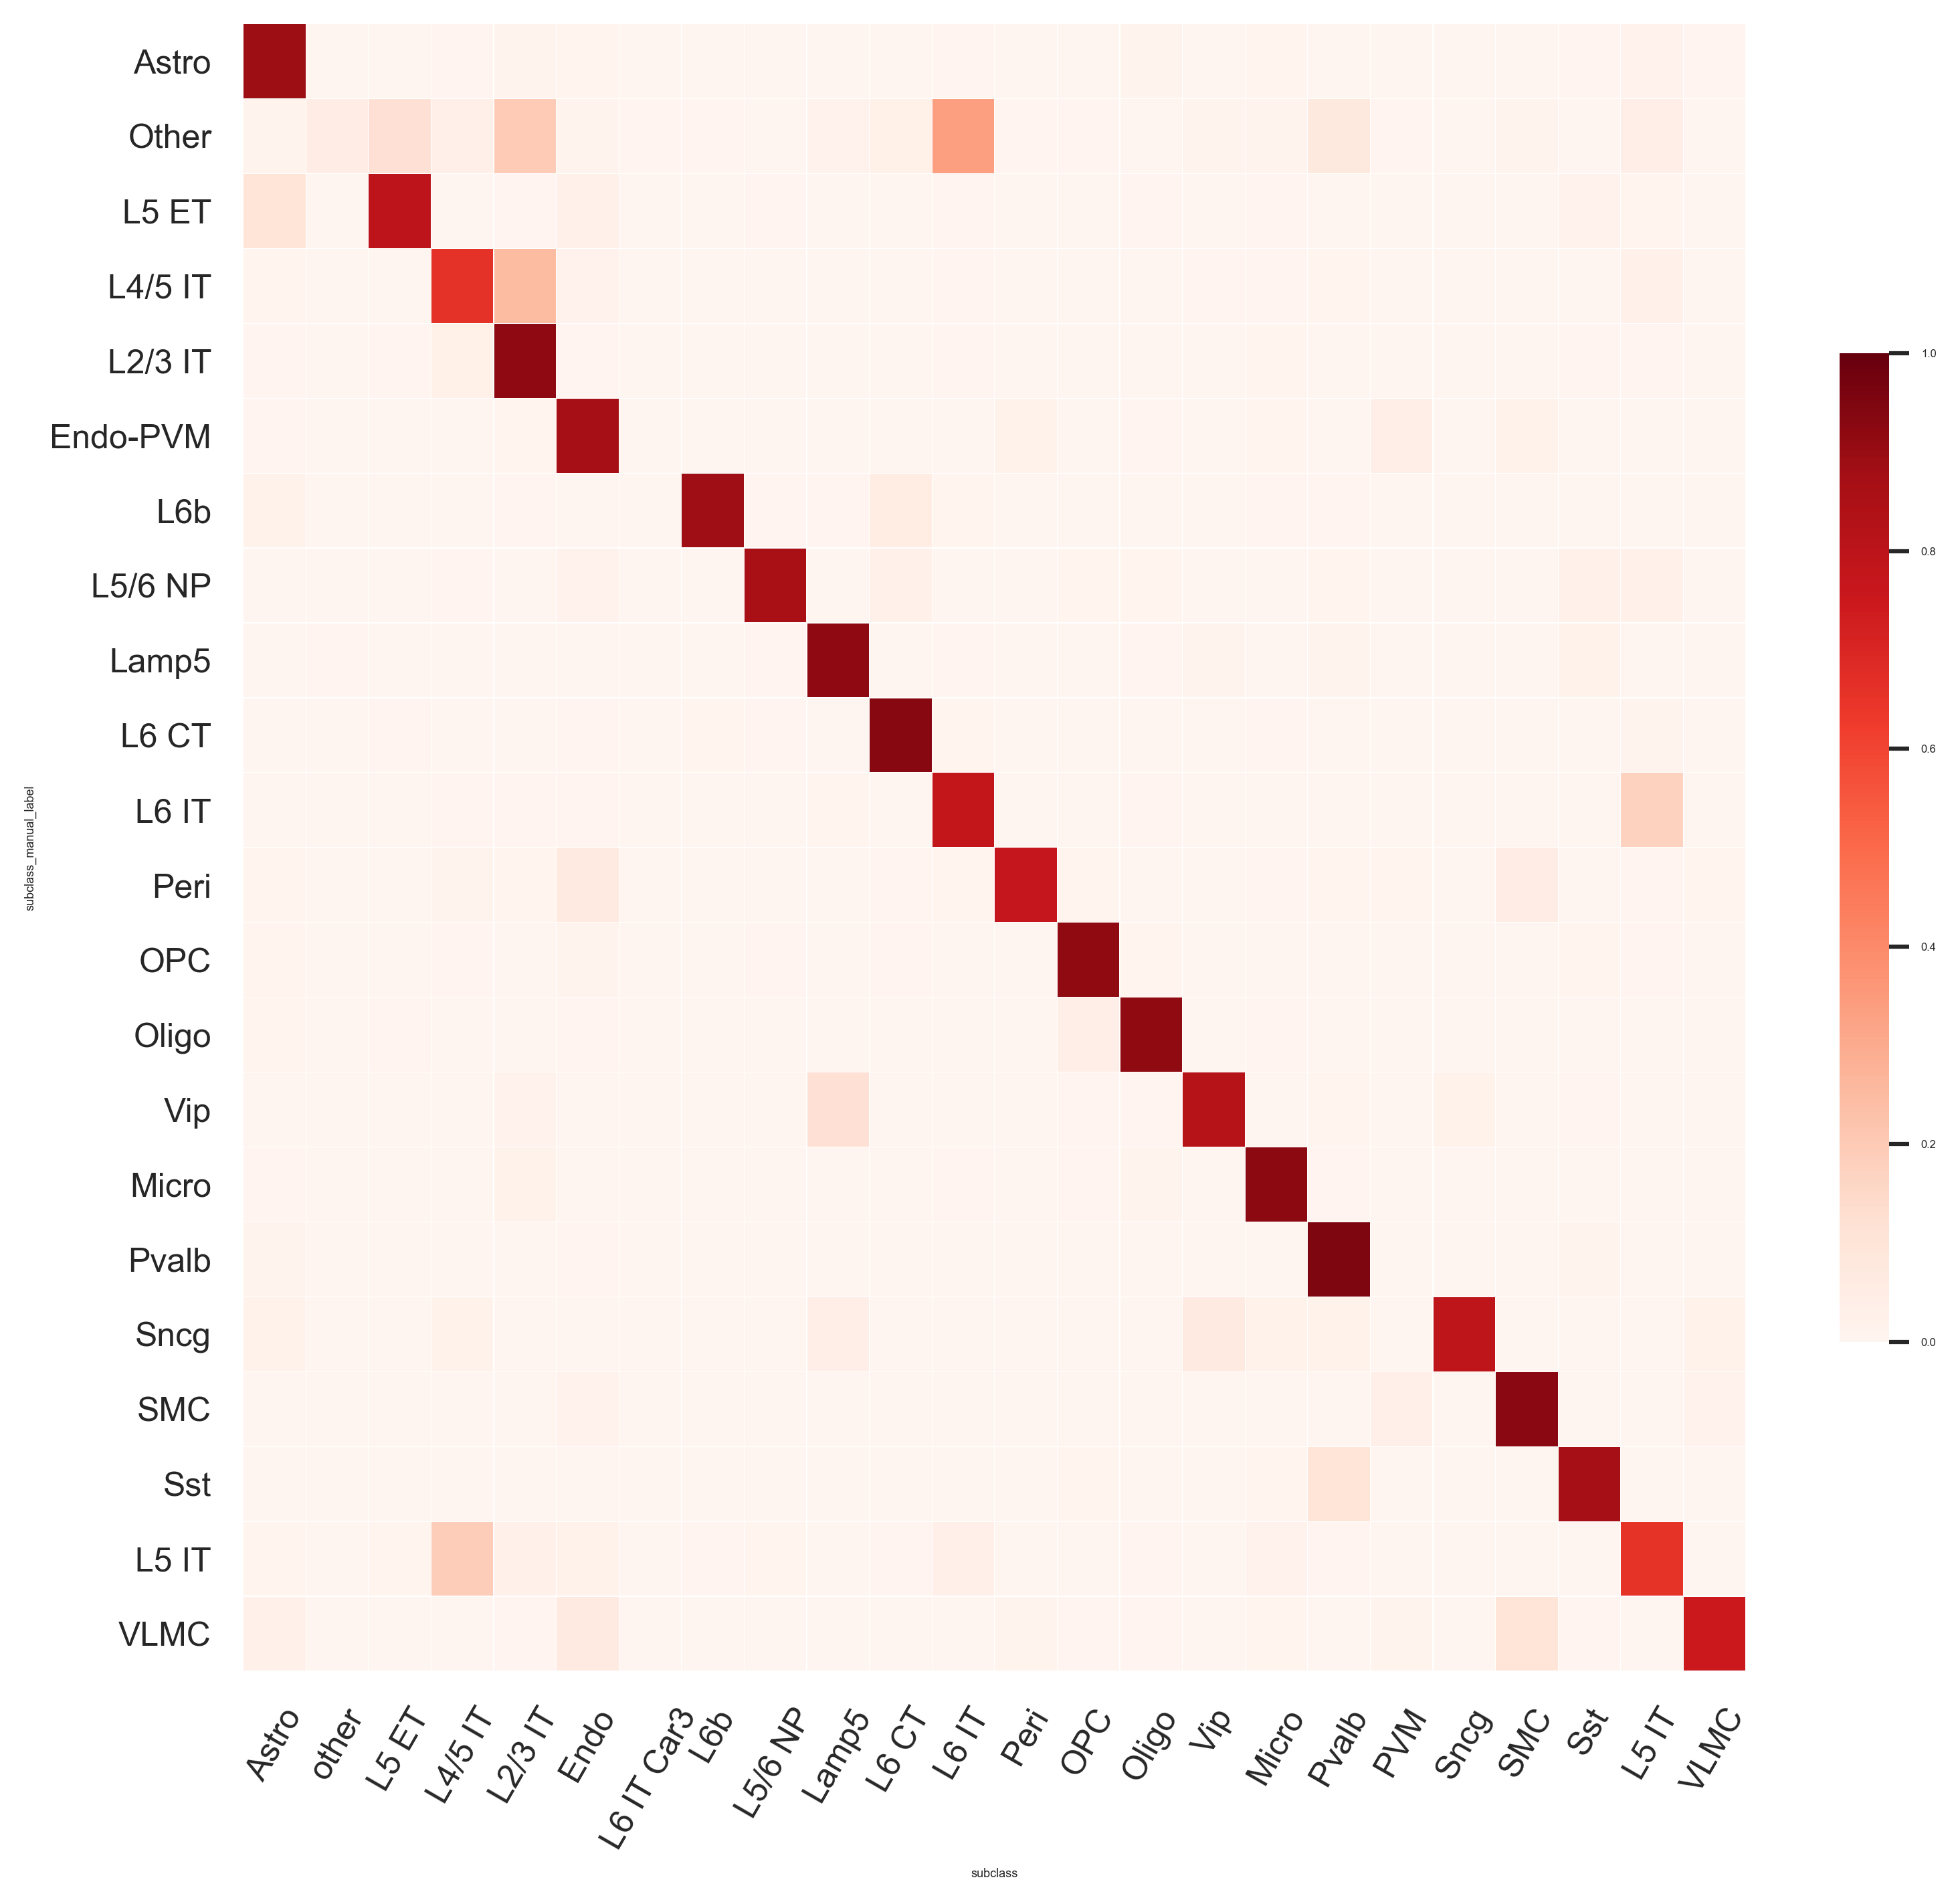

In [61]:
prediction_column = 'subclass_prediction_label_2'

ref_cluster_column = 'subclass'

#query_cluster_column = 'leiden_subclass'
query_cluster_column = 'subclass_manual_label'



print('Predict cell types.')
predict_classes(nnc, adata_query, prediction_column, genes)
    
# Count predictions
prediction_counts = adata_query.obs[[query_cluster_column, prediction_column]]
prediction_counts['count'] = 1
    
predictionMatrix = pd.pivot_table(prediction_counts, index=[query_cluster_column],
               columns=[prediction_column], values='count', aggfunc=np.sum).fillna(0)

predictionMatrix['total'] = predictionMatrix.sum(axis = 1)
    
fractions = predictionMatrix.iloc[:,:-1].div(predictionMatrix['total'],axis = 0)
    
#fractions_sorted, rows, columns = runPermutation(fractions,'Columns')
fractions_sorted, rows, columns = runPermutation(fractions,'Both')
    
# Plot
fig1=plt.figure(figsize = (10,9))
sns.set(font_scale=0.3)
#sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
sns.heatmap(fractions_sorted, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(rotation = 60)
plt.yticks(rotation = 'horizontal')    
    
plt.xlabel(ref_cluster_column) 
plt.ylabel(query_cluster_column)
plt.show()

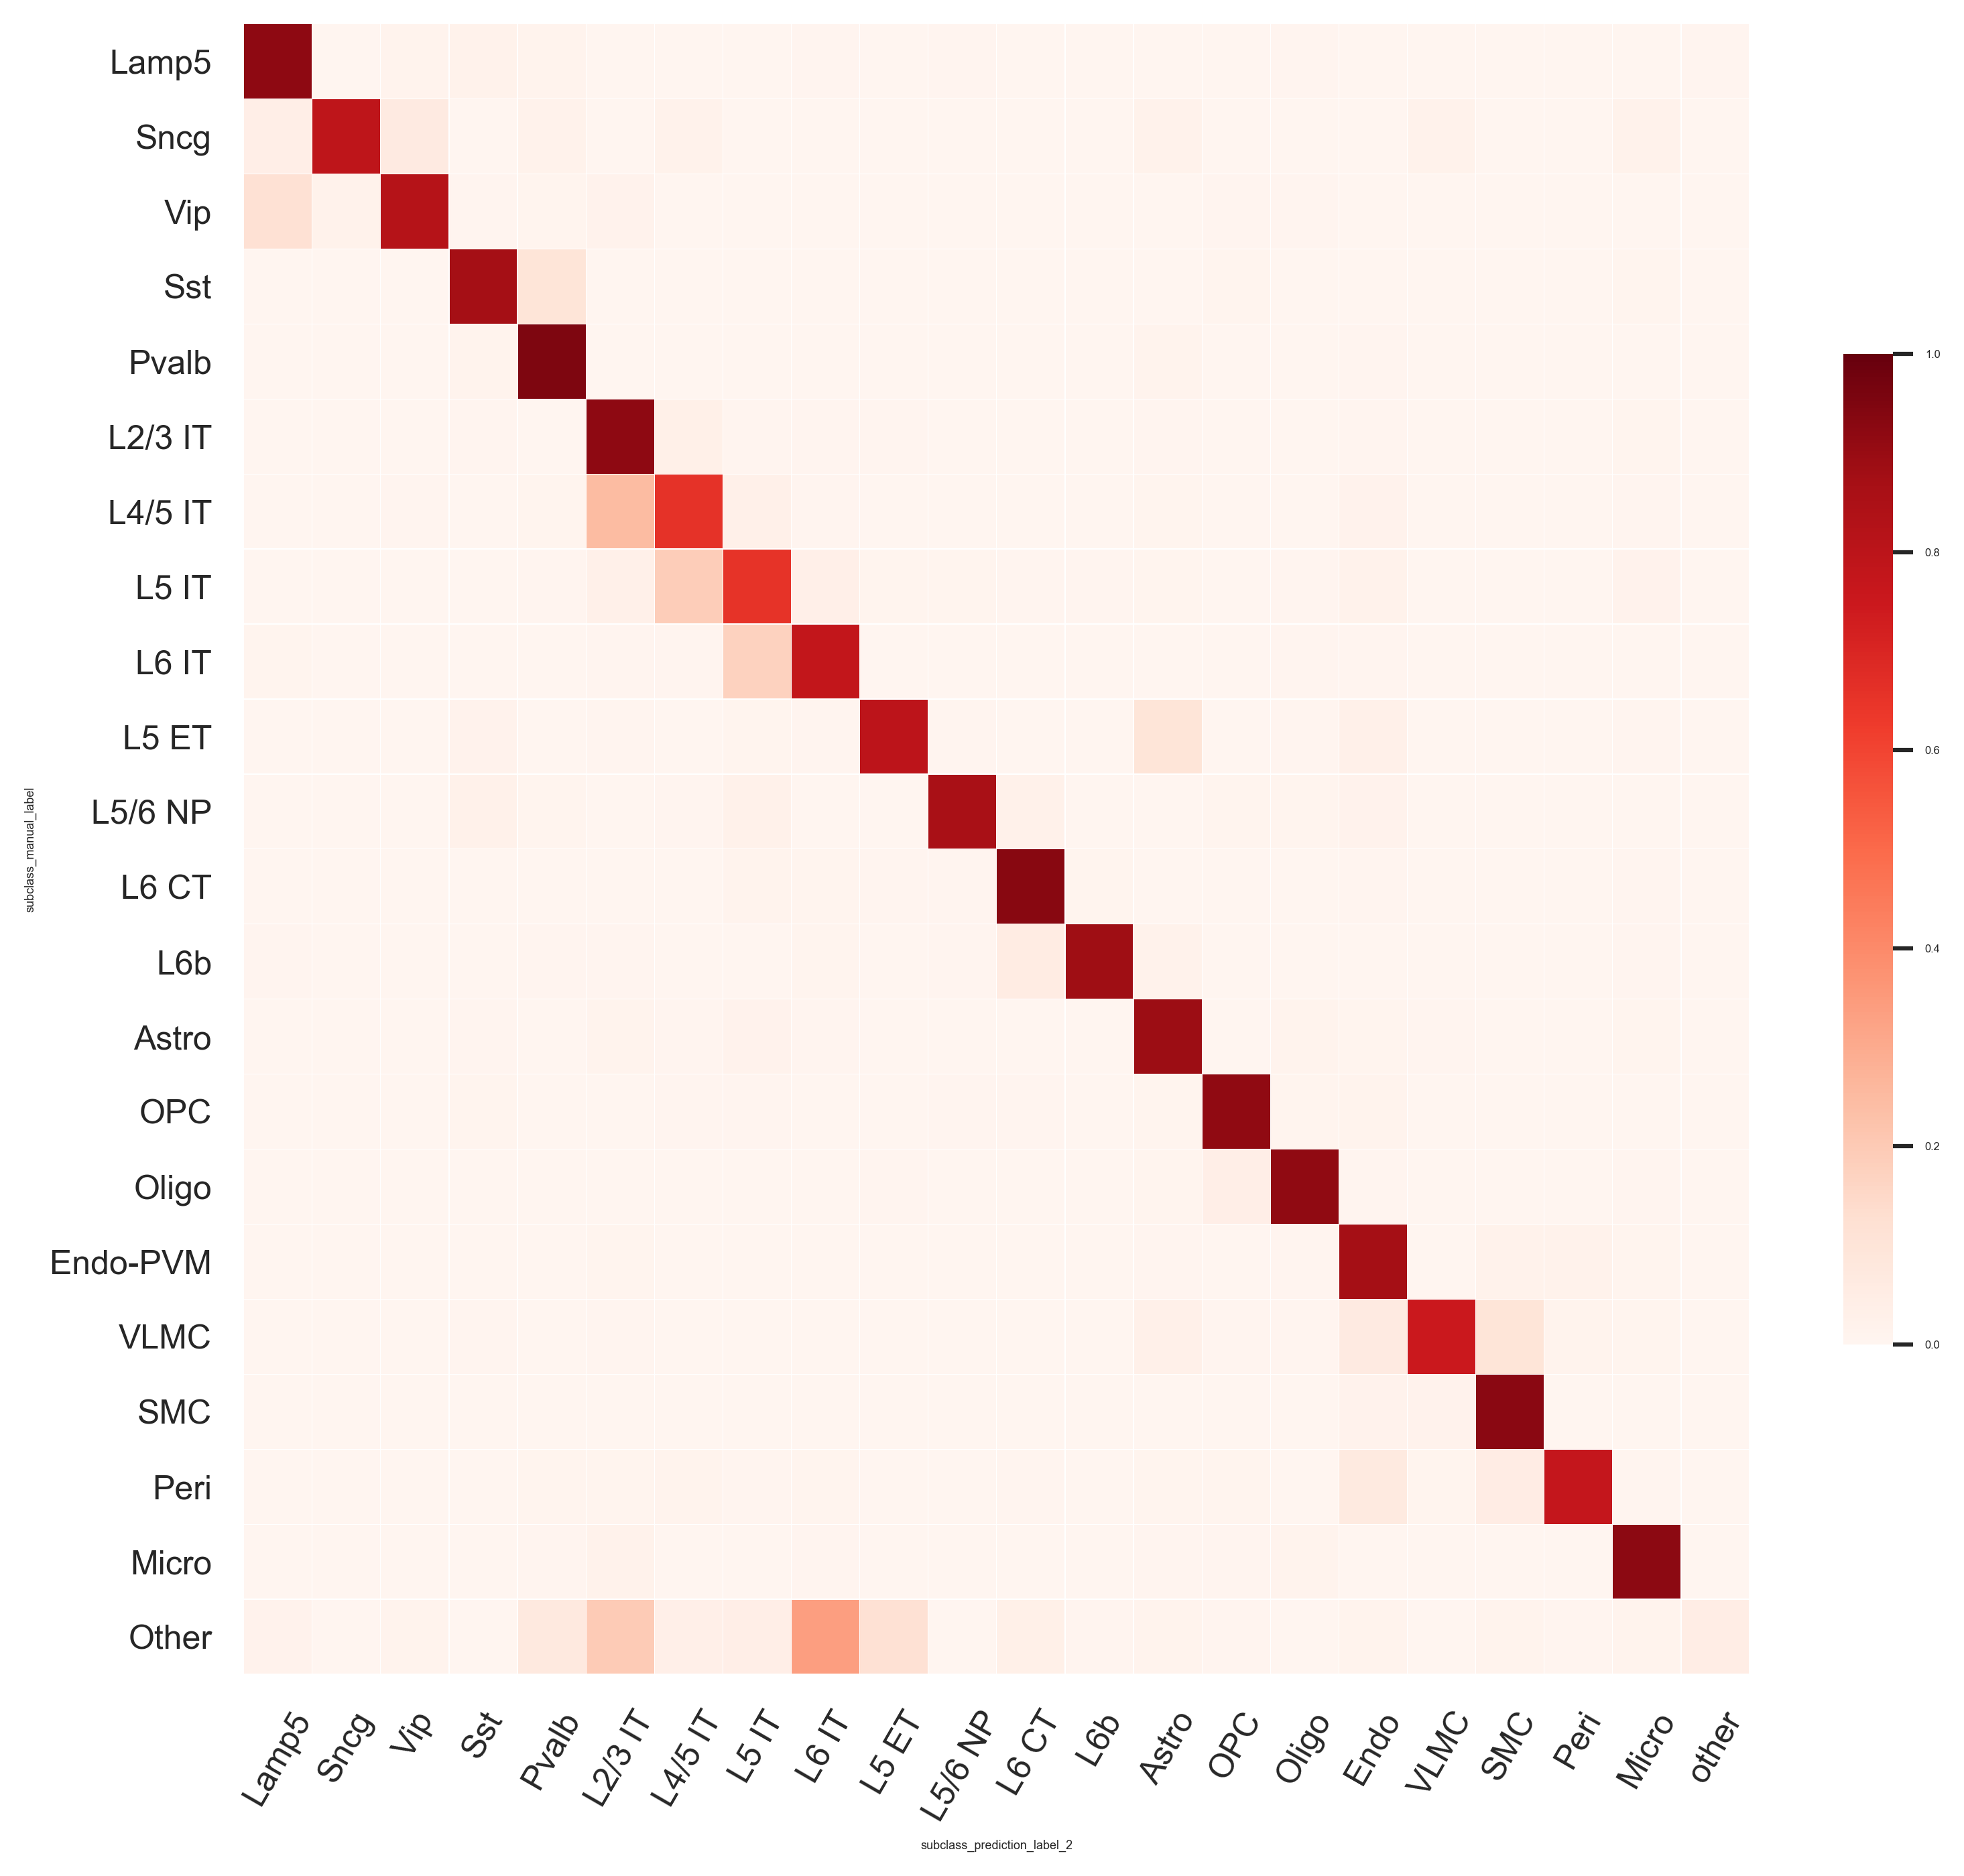

In [63]:
# sort the labels along the x-axis (optional)

sorted_predicted_labels = ['Lamp5','Sncg','Vip','Sst','Pvalb','L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L5 ET','L5/6 NP','L6 CT','L6b','Astro','OPC','Oligo','Endo','VLMC','SMC','Peri',
                         'Micro','other']

fractions_sorted_by_label = fractions_sorted[sorted_predicted_labels]

sorted_coor_df, rows, columns = runPermutation(fractions_sorted_by_label,'Rows',maxIter = 100,maxTrys = 15)

manual_coor_df = sorted_coor_df


_plot = True
if _plot:
   # Plot
    fig1=plt.figure(figsize = (10,9))
    sns.set(font_scale=0.3)
    #sns.heatmap(fractions_sorted, cmap='Greys', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    sns.heatmap(manual_coor_df, cmap='Reds', vmin=0, vmax=1, cbar=True, linewidths=.05,cbar_kws={"shrink": .6})
    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.xticks(rotation = 60)
    plt.yticks(rotation = 'horizontal')
    #plt.xlabel(sorted_coor_df.columns) 
    #plt.ylabel(sorted_coor_df.index)
    plt.show()

In [77]:
h5ad_fname

labeled_savename

'20220303_labeled.h5ad'

In [78]:
labeled_savename = MOp_MERFISH_preprocessed_for_integration_file.replace('20220303.h5ad','20220303_labeled.h5ad')

_save_result=True

if _save_result:
    adata_query.write(labeled_savename)
    print ('Save the final labels.')
else:
    if os.path.exists(labeled_savename):
        print ('Result exists, no overwrite.')
    else:
        print ('Save the final labels.')

Save the final labels.


## 7. Plot the clustering result on spatial map

In [66]:
adata=adata_query

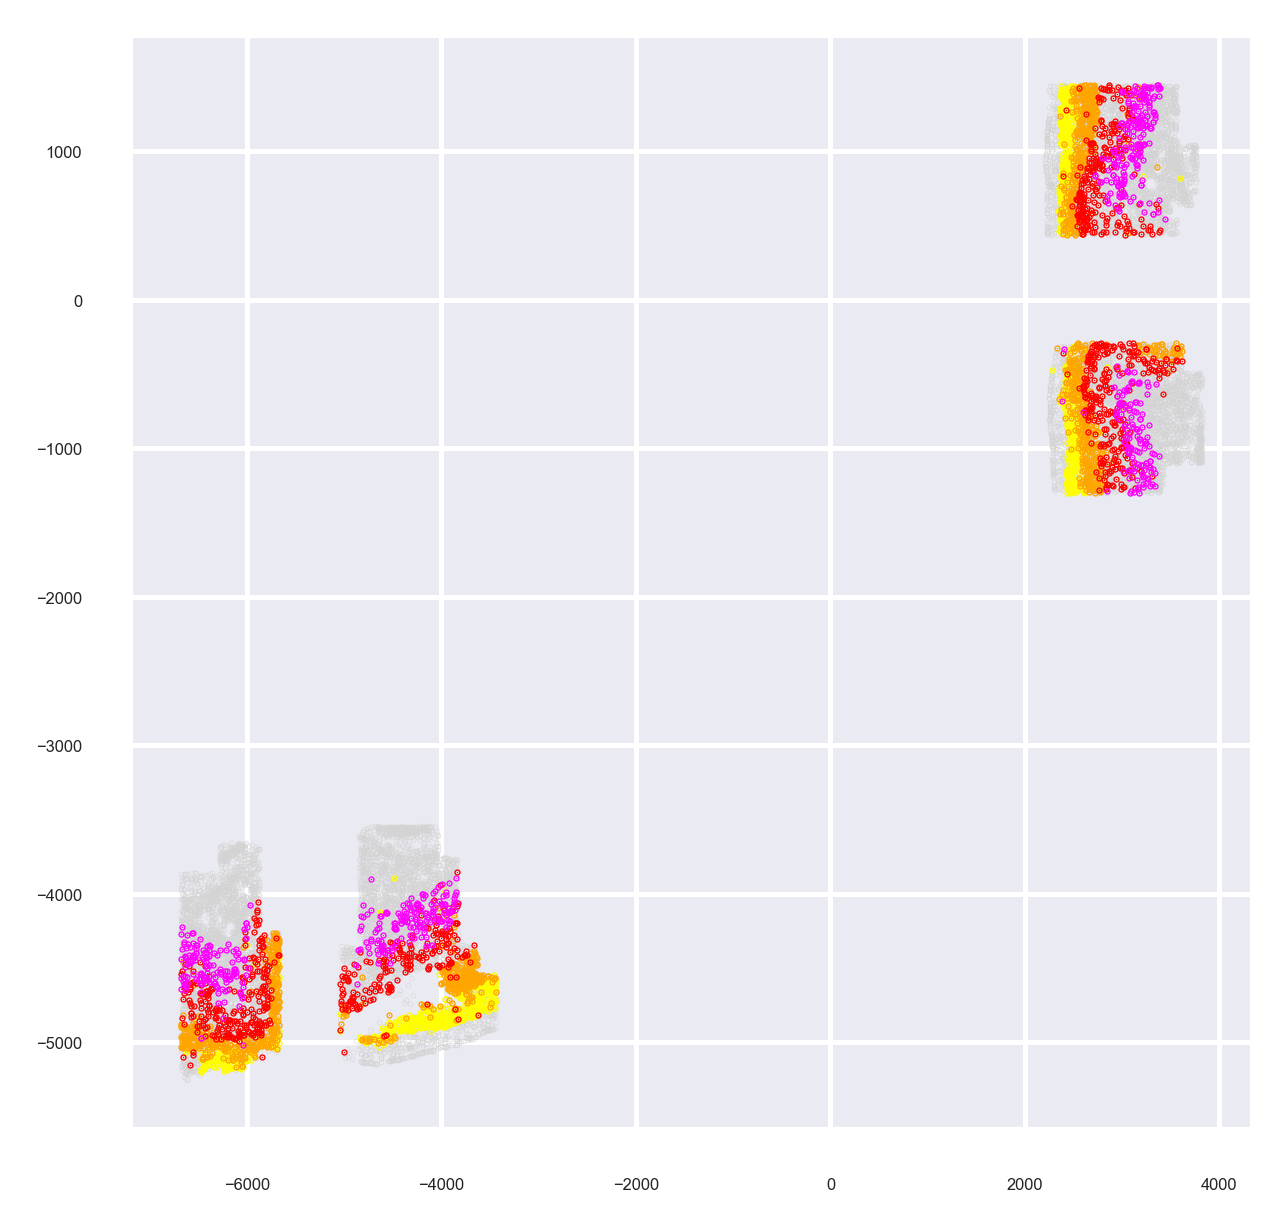

In [67]:
import matplotlib.pyplot as plt

plt.scatter(adata.obs['center_x'], adata.obs['center_y'], c='lightgrey', s=0.01)




df = adata.obs[adata.obs['subclass_manual_label'] == 'L2/3 IT']
plt.scatter(df['center_x'], df['center_y'], c='yellow', s=0.07)


df = adata.obs[adata.obs['subclass_manual_label'] == 'L4/5 IT']
plt.scatter(df['center_x'], df['center_y'], c='orange', s=0.07)


df = adata.obs[adata.obs['subclass_manual_label'] == 'L5 IT']
plt.scatter(df['center_x'], df['center_y'], c='red', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'L6 IT']
plt.scatter(df['center_x'], df['center_y'], c='Magenta', s=0.07)





(-7206.15200267192, 4342.789910754375, -5588.743224719632, 1783.881879691128)

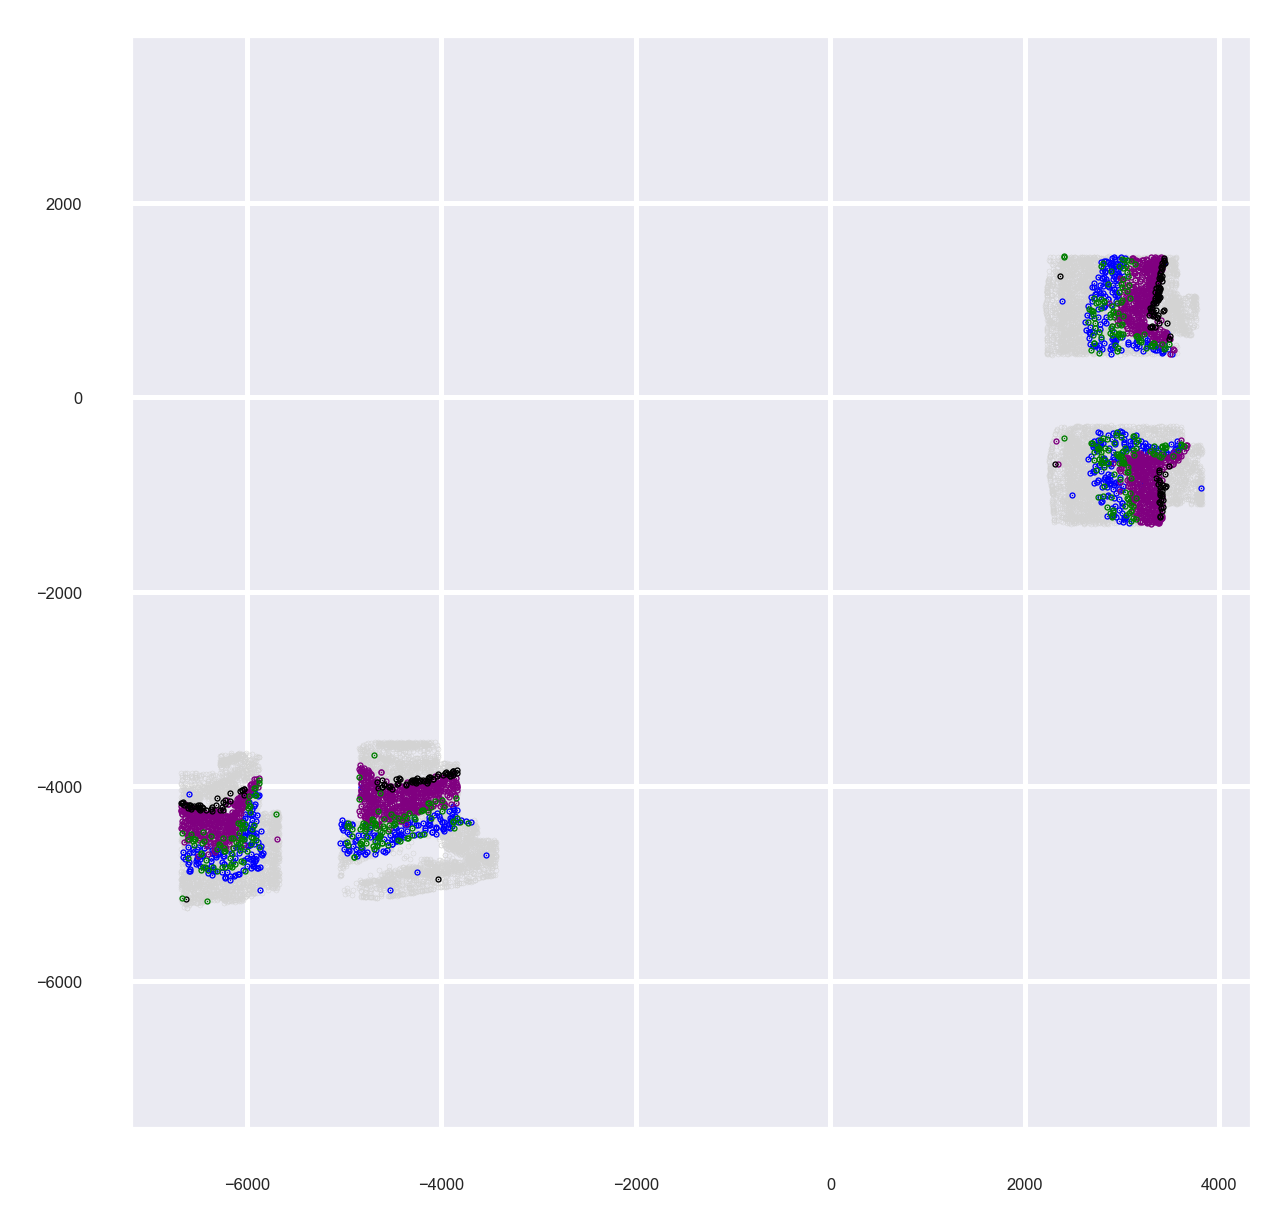

In [68]:
import matplotlib.pyplot as plt

plt.scatter(adata.obs['center_x'], adata.obs['center_y'], c='lightgrey', s=0.01)


df = adata.obs[adata.obs['subclass_manual_label'] == 'L5 ET']
plt.scatter(df['center_x'], df['center_y'], c='blue', s=0.07)


df = adata.obs[adata.obs['subclass_manual_label'] == 'L6 CT']
plt.scatter(df['center_x'], df['center_y'], c='purple', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'L6b']
plt.scatter(df['center_x'], df['center_y'], c='black', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'L5/6 NP']
plt.scatter(df['center_x'], df['center_y'], c='green', s=0.07)

plt.axis('equal')

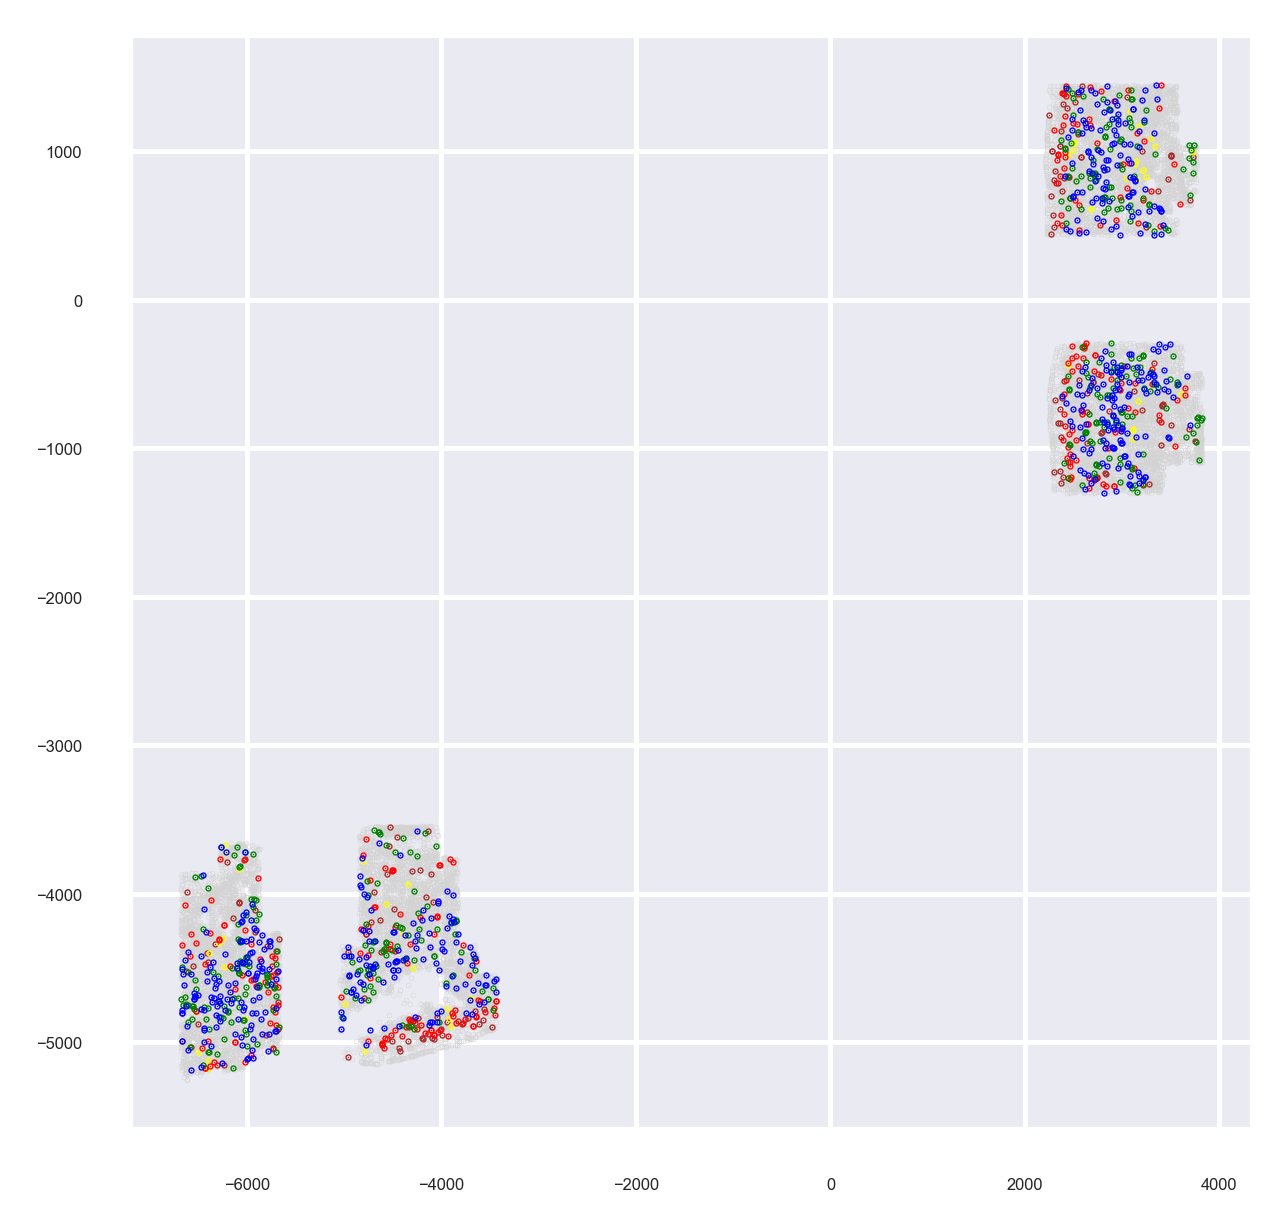

In [69]:
import matplotlib.pyplot as plt

plt.scatter(adata.obs['center_x'], adata.obs['center_y'], c='lightgrey', s=0.01)


df = adata.obs[adata.obs['subclass_manual_label'] == 'Lamp5']
plt.scatter(df['center_x'], df['center_y'], c='brown', s=0.07)


df = adata.obs[adata.obs['subclass_manual_label'] == 'Sncg']
plt.scatter(df['center_x'], df['center_y'], c='yellow', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'Vip']
plt.scatter(df['center_x'], df['center_y'], c='red', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'Sst']
plt.scatter(df['center_x'], df['center_y'], c='green', s=0.07)


df = adata.obs[adata.obs['subclass_manual_label'] == 'Pvalb']
plt.scatter(df['center_x'], df['center_y'], c='blue', s=0.07)

(-7206.15200267192, 4342.789910754375, -5588.743224719632, 1783.881879691128)

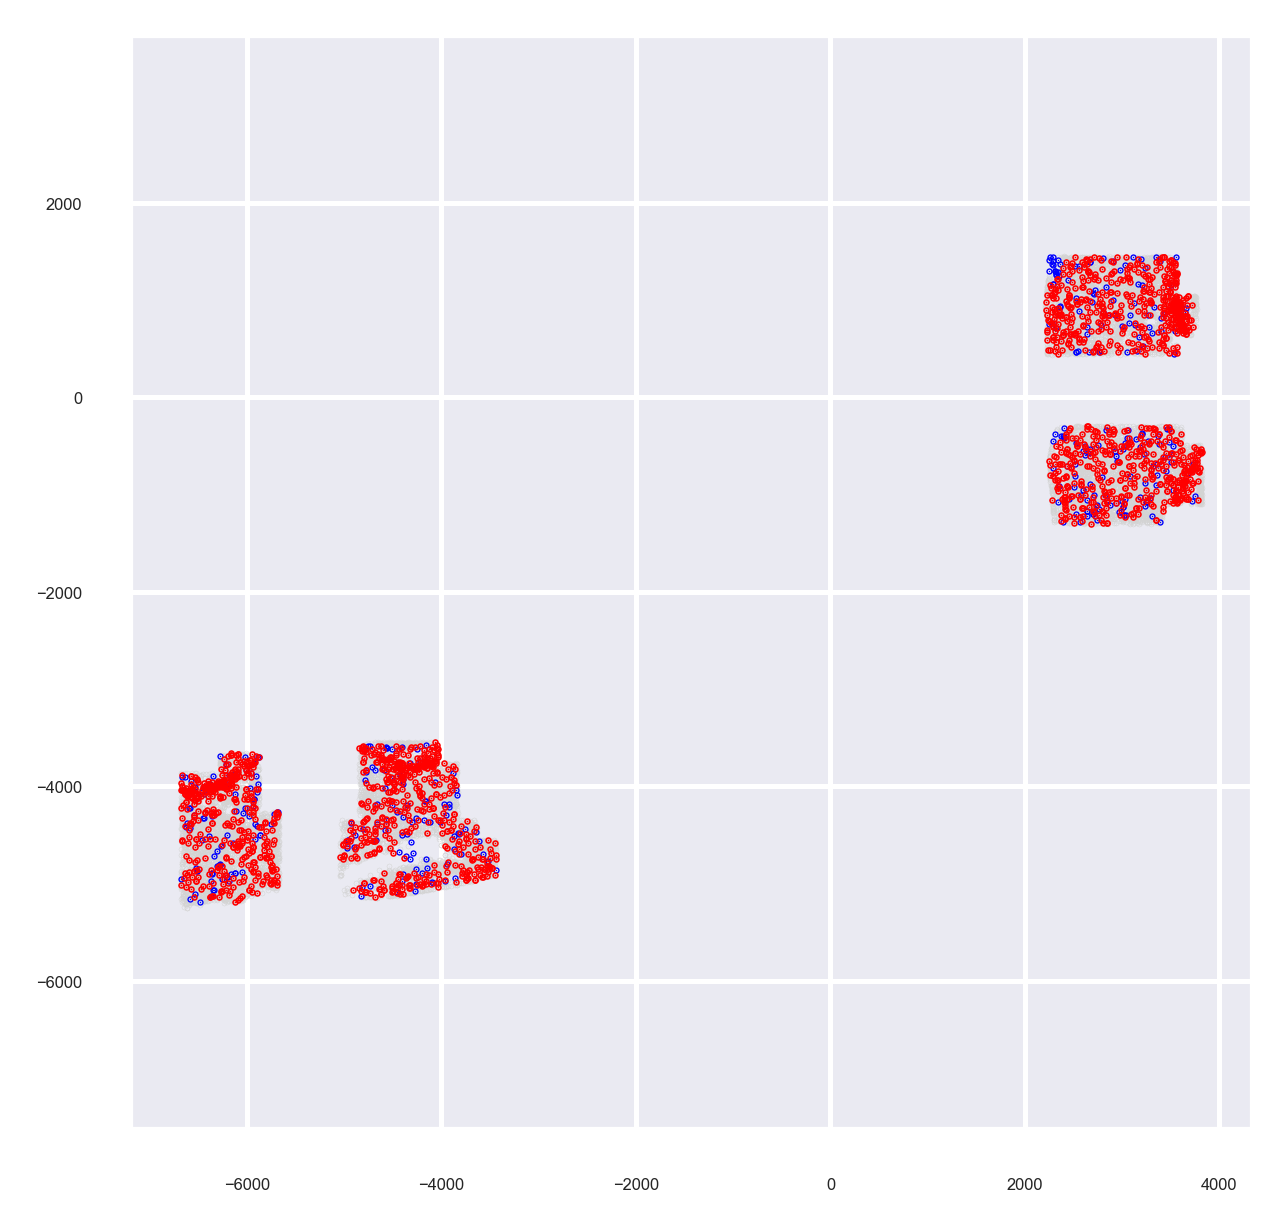

In [76]:
import matplotlib.pyplot as plt

plt.scatter(adata.obs['center_x'], adata.obs['center_y'], c='lightgrey', s=0.01)

df = adata.obs[adata.obs['subclass_manual_label'] == 'VLMC-SMC']
plt.scatter(df['center_x'], df['center_y'], c='black', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'Peri']
plt.scatter(df['center_x'], df['center_y'], c='blue', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'Endo']
plt.scatter(df['center_x'], df['center_y'], c='orange', s=0.07)

df = adata.obs[adata.obs['subclass_manual_label'] == 'Astro']
plt.scatter(df['center_x'], df['center_y'], c='red', s=0.1)

plt.axis('equal')

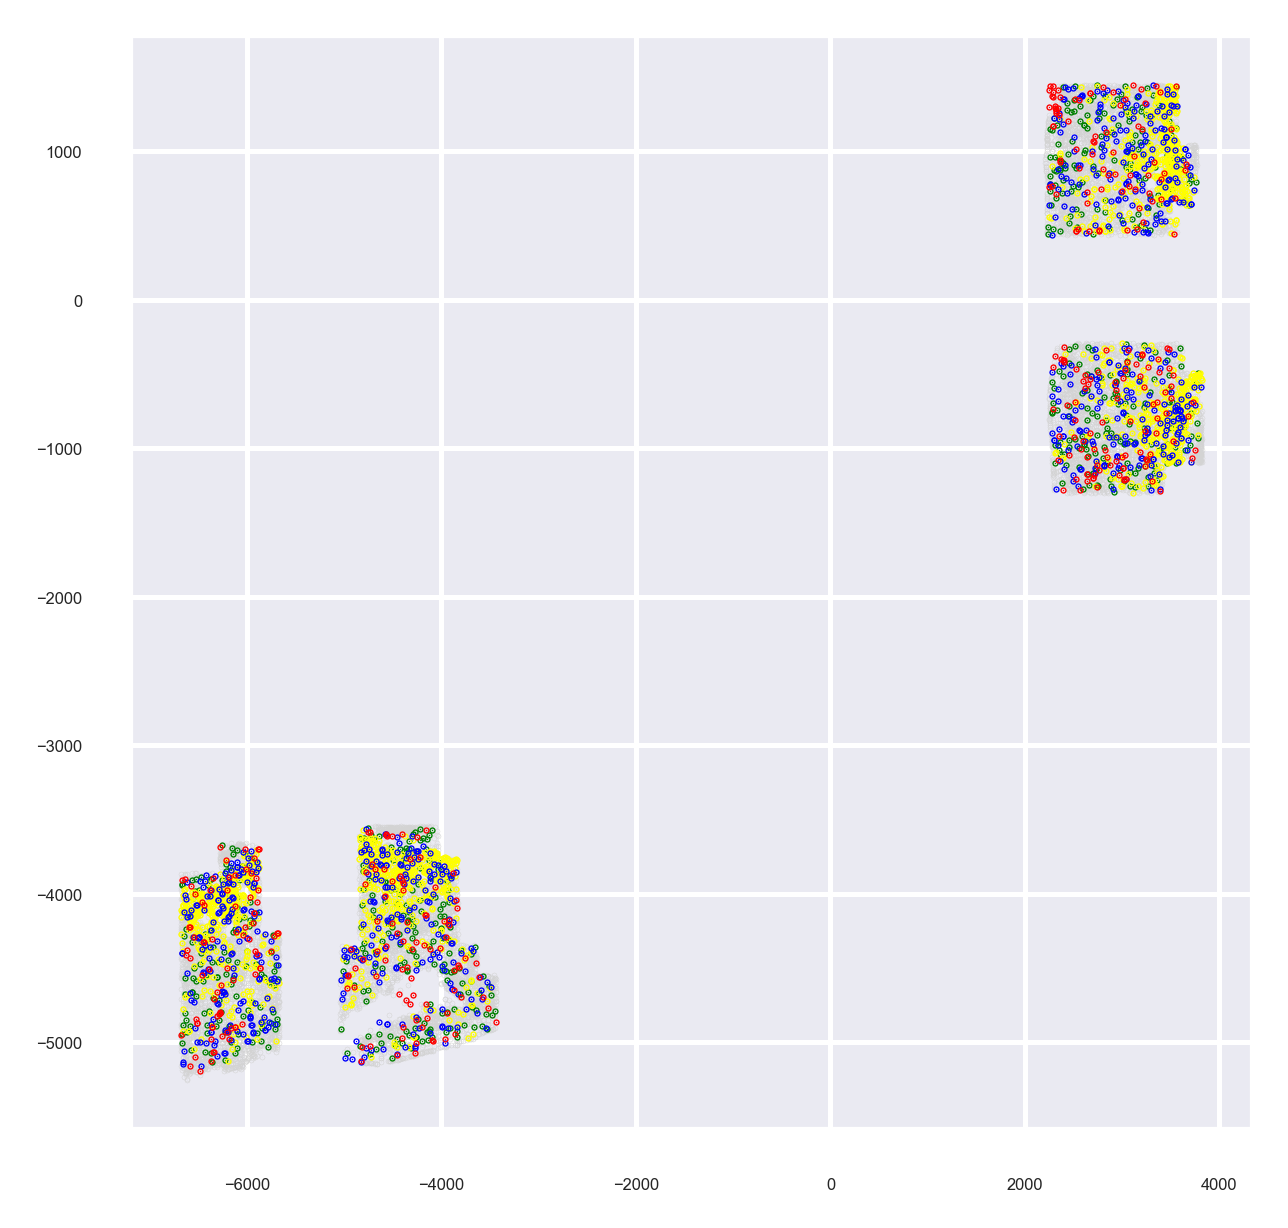

In [75]:
import matplotlib.pyplot as plt

data_small = adata.obs[adata.obs['center_x']>0]
data_small =data_small[data_small['center_y']>0]

plt.scatter(adata.obs['center_x'], adata.obs['center_y'], c='lightgrey', s=0.01)



df = adata.obs[adata.obs['subclass_manual_label'] == 'Micro']
plt.scatter(df['center_x'], df['center_y'], c='green', s=0.07)



df = adata.obs[adata.obs['subclass_manual_label'] == 'Oligo']
plt.scatter(df['center_x'], df['center_y'], c='yellow', s=0.07)



df = adata.obs[adata.obs['subclass_manual_label'] == 'OPC']
plt.scatter(df['center_x'], df['center_y'], c='blue', s=0.07)



df = adata.obs[adata.obs['subclass_manual_label'] == 'Peri']
plt.scatter(df['center_x'], df['center_y'], c='red', s=0.07)

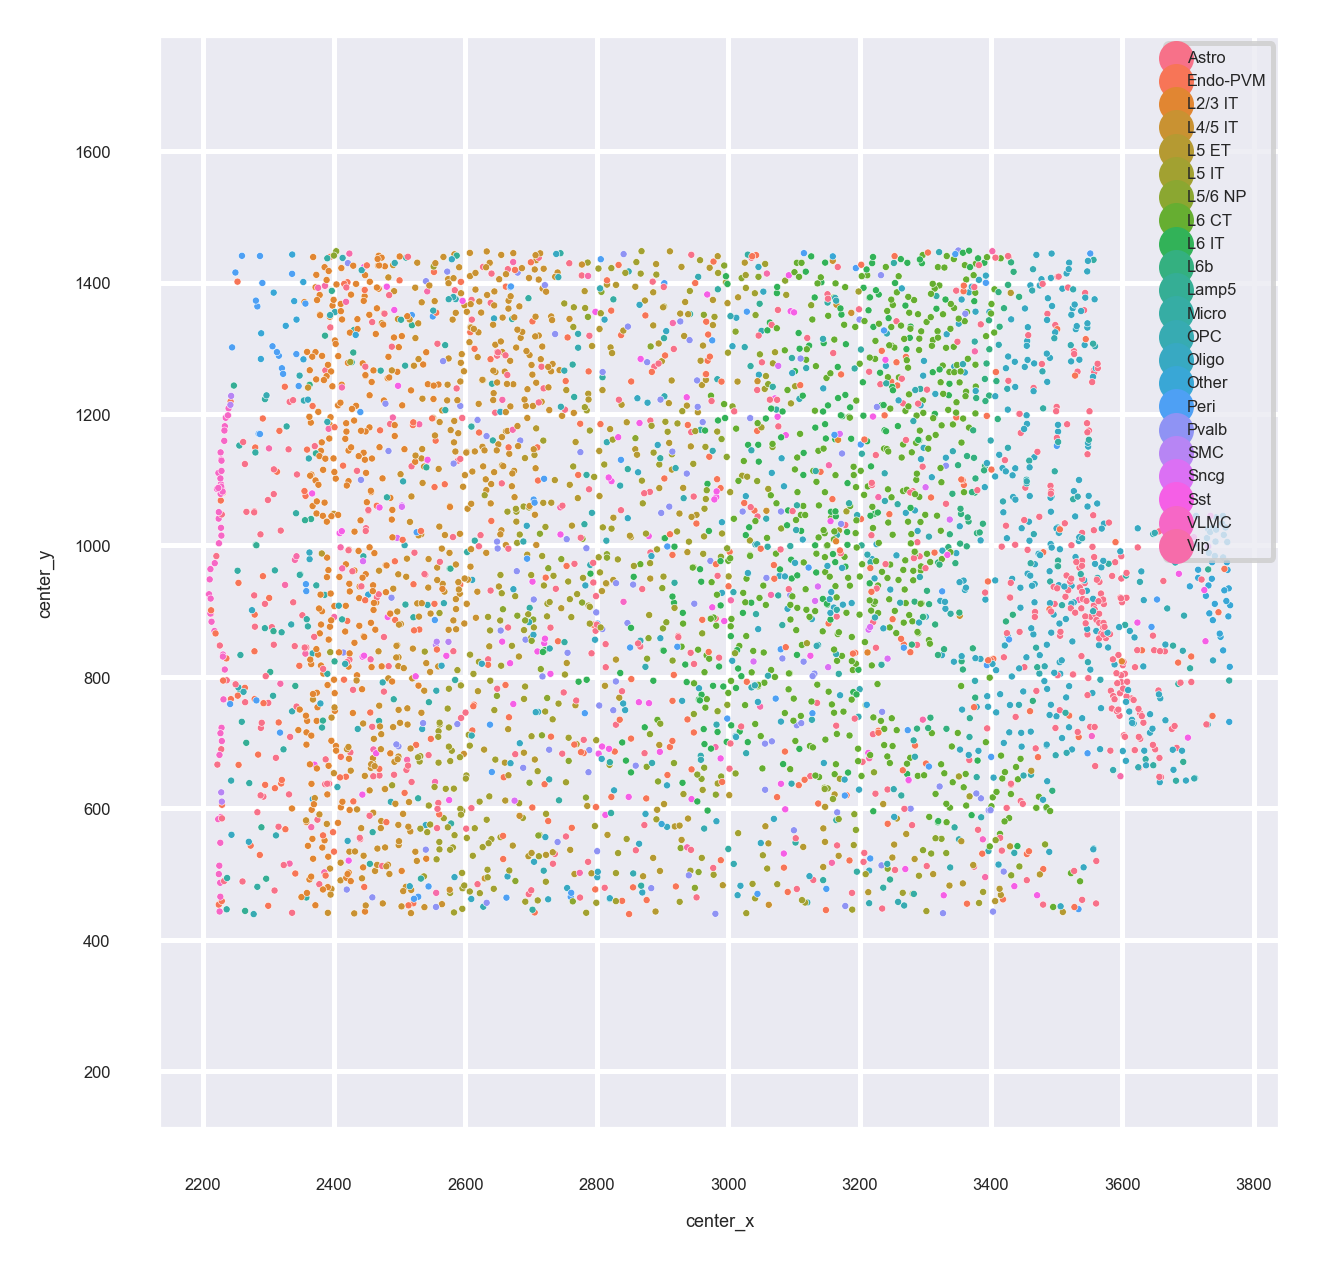

In [74]:
import matplotlib.pyplot as plt


data_small = adata.obs[adata.obs['center_x']>0]
data_small =data_small[data_small['center_y']>0]


sns.scatterplot(data=data_small, x='center_x', y='center_y', hue='subclass_manual_label', s=2)
plt.axis('equal')
plt.legend(loc='best')

In [ ]:
len(adata)